## 12. Time Series Models of Heteroscedascity

**Exercise 12.1**.  Display the time sequence plot of the absolute returns for the CREF data.  Repeat the plot with the squared returns. Comment on the volatility patterns observed in these plots.  (The data are in file named `CREF`.)

**Solution**.

In [1]:
require(ggplot2)
require(data.table)
require(tseries)
require(lmtest)

Loading required package: ggplot2

Loading required package: data.table

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
Y <- fread('../data/CREF.dat')[['CREF']]

logY = log(Y)
r = logY[-1] - logY[-(length(Y))]

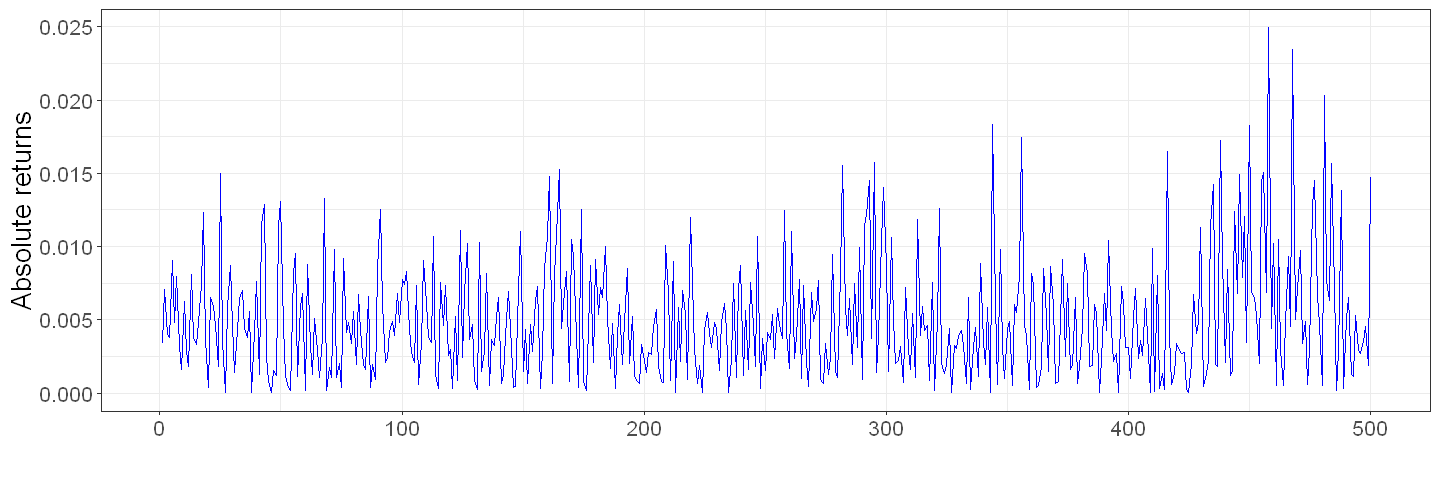

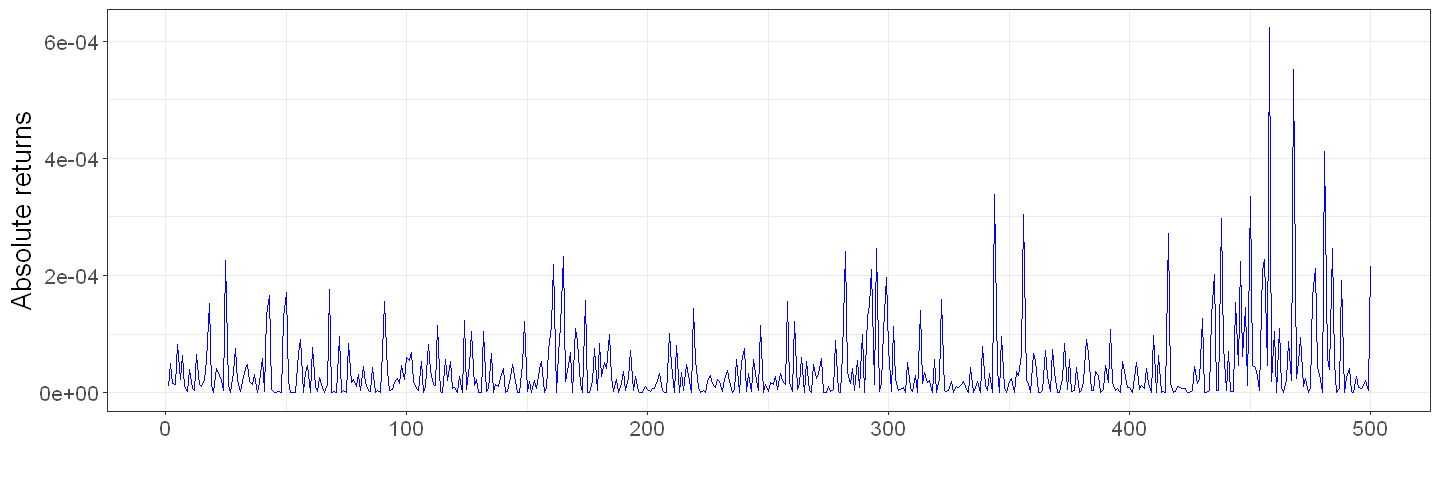

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(r), y = abs(r)), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x = 1:length(r), y = r**2), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

Volatility clustering can be observed in both plots, though it is visually more obvious on the squared returns plot.

**Exercise 12.2**.  Plot the time sequence plot of the absolute returns for the USD/HKD exchange rate data.  Repeat the plot with the squared returns.  Comment on the volatility patterns observed in these plots.  (The data are in the file named `usd.hkd`.)

In [4]:
r <- fread('../data/usd.hkd.dat')[['r']]

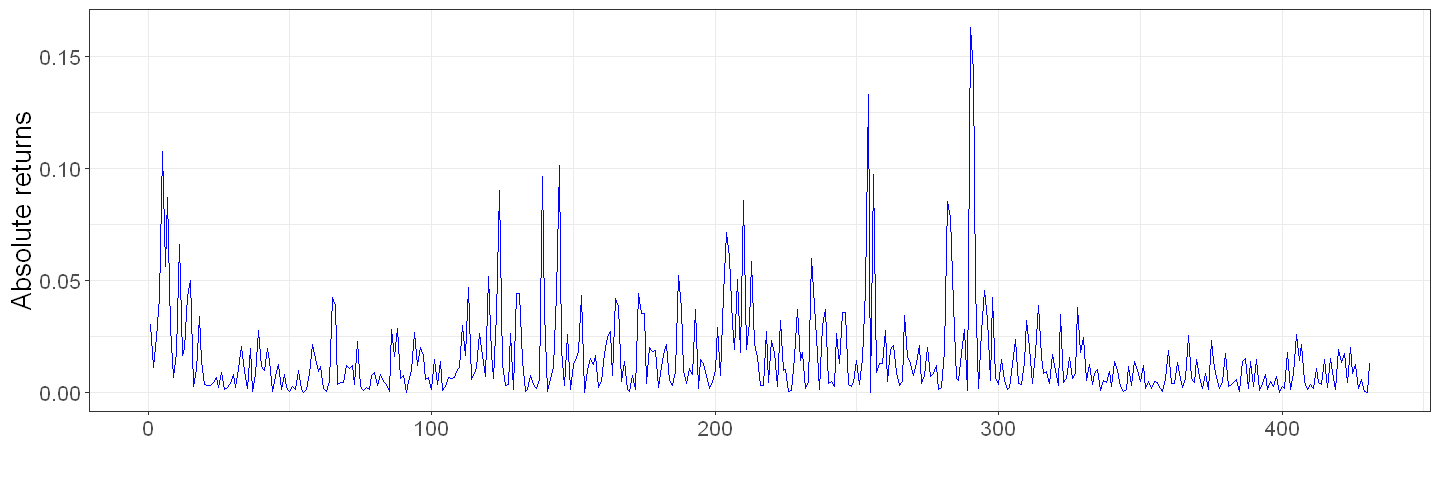

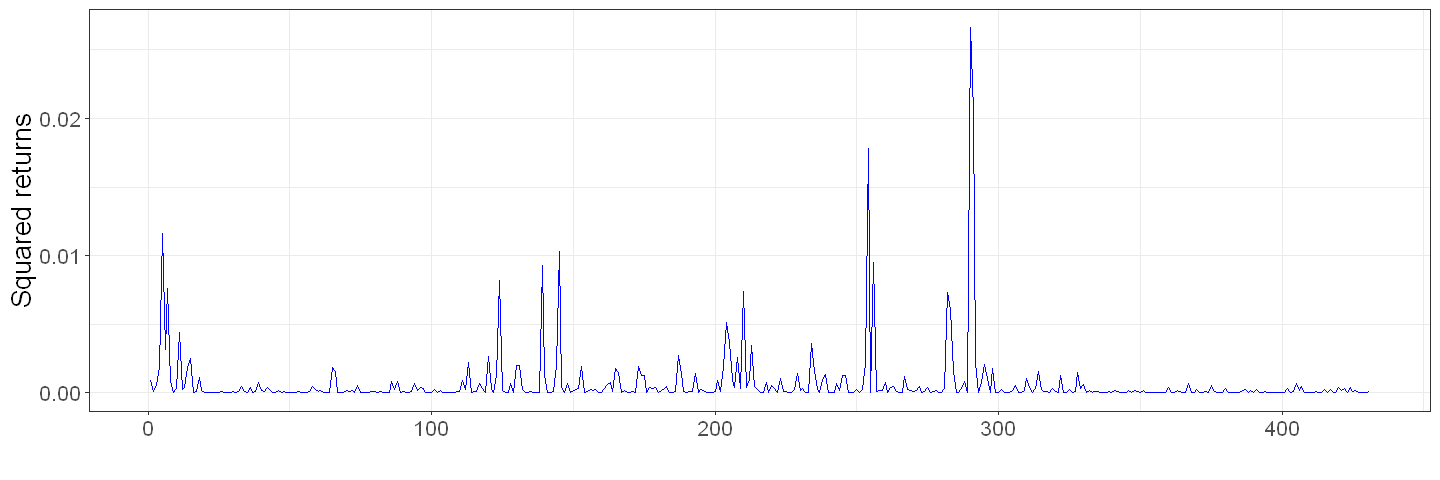

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(r), y = abs(r)), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x = 1:length(r), y = r**2), color="blue") + 
  xlab('') + ylab('Squared returns') +
  theme_bw() + theme(text = element_text(size=16))

Volatility clustering is evident in both charts.

**Exercise 12.3**.  Use the definition $\eta_t = r_t^2 - \sigma_{t | t - 1}^2$ \[Equation (12.2.4) on page 287\] and show that $\{ \eta_t \}$ is a serially uncorrelated sequence.  Show also that $\eta_t$ is uncorrelated with past squared returns, that is, show that $\text{Corr}[\eta_t, r^2_{t - k}] = 0$ for $k > 0$.

**Solution**.  We have:

$$ 
\begin{align}
\text{E}[\eta_t] &= \text{E}[r_t^2 - \sigma_{t | t-1}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and for $k > 0$

$$ 
\begin{align}
\text{E}[\eta_t \eta_{t - k}] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2)(r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot (r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \cdot 0 ] \\
&= 0
\end{align}
$$

Therefore,

$$ \text{Cov}[\eta_t, \eta_{t - k}] = \text{E}[\eta_t \eta_{t - k}] - \text{E}[\eta_t] \text{E}[\eta_{t-k}] = 0 $$

and so the $\{ \eta_t \}$ is serially uncorrelated.

We also have

$$ 
\begin{align}
\text{E}[\eta_t r_{t - k}^2] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2) r_{t-k}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot r_{t-k}^2 ] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and so

$$ \text{Cov}[\eta_t, r_{t - k}^2] = \text{E}[\eta_t r_{t - k}^2] - \text{E}[\eta_t] \text{E}[r_{t-k}^2] = 0 $$

which is the desired result.

**Exercise 12.4**.  Substituting $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ into Equation (12.2.2) on page 285 show the algebra that leads to Equation (12.2.5) on page 287.

**Solution**.  Equation (12.2.2) states

$$ \sigma_{t | t - 1}^2 = \omega + \alpha r_{t-1}^2 \tag{12.2.2} $$

The result follows immediately when replacing $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ and adding $\eta_t$ to both sides,

$$ r_t^2 = \omega + \alpha r_{t-1}^2 + \eta_t \tag{12.2.5} $$

**Exercise 12.5**.  Verify Equation (12.2.8) on page 288.

**Solution**.  Equation (12.2.8) states

$$ \tau = \omega^2 + 2 \omega \alpha \sigma^2 + \alpha^2 3 \tau \tag{12.2.8} $$

Following the procedure of raising both sides of Equation (12.2.2) to the second power and taking expectation, we get

$$ \text{E}[\sigma_{t | t - 1}^4] = \text{E}[\omega^2 + 2 \alpha \omega r_{t-1}^2 + \alpha^2 r_{t-1}^4] $$

Using Equation (12.2.7), which states that $\text{E}[r_{t-1}^4] = 3 \tau$, we get

$$ \tau = \text{E}[\sigma_{t | t - 1}^4] = \omega^2 + 2 \alpha \omega \text{E}[r_{t-1}^2] + 3 \alpha^2 \tau $$

and from $\text{E}[r_{t-1}^2] = \sigma^2$ we get our result.

**Exercise 12.6**.  Without doing any theoretical calculations, order the kurtosis values of the following four distributions in ascending order: the t-distribution with 10 DF, the t-distribution with 30 DF, the uniform distribution on \[−1,1\], and the normal distribution with mean 0 and variance 4.  Explain your answer.

**Solution**.  The order is:

- Uniform distribution on \[-1, 1\]
- Normal distribution with mean 0 and variance 4
- t-distribution with 30 DF
- t-distribution with 10 DF

Kurtosis measures how "heavy" the tails of a distribution are.  The uniform distribution has no "tails" at all, as the PDF goes to zero outside of an interval, and the t-distribution has heavier tails than the normal distribution, with it becoming wider with smaller number of degrees of freedom.

**Exercise 12.7**.  Simulate a GARCH(1,1) process with α = 0.1 and β = 0.8 and of length 500. Plot the time series and inspect its sample ACF, PACF, and EACF. Are the data consistent with the assumption of white noise?

**(a)** Square the data and identify a GARCH model for the raw data based on the sample ACF, PACF, and EACF of the squared data.

**(b)** Identify a GARCH model for the raw data based on the sample ACF, PACF and EACF of the absolute data. Discuss and reconcile any discrepancy between the tentative model identified with the squared data and that with the absolute data.

**(c)** Perform the McLeod-Li test on your simulated series. What do you conclude?

**(d)** Repeat the exercise but now using only the first 200 simulated data. Discuss your findings.

**Solution**.

In [6]:
source('eacf.R')
source('garch.sim.R')

In [7]:
set.seed(0)
Y = garch.sim(alpha=c(0.01, 0.1), beta=0.8, n=500)

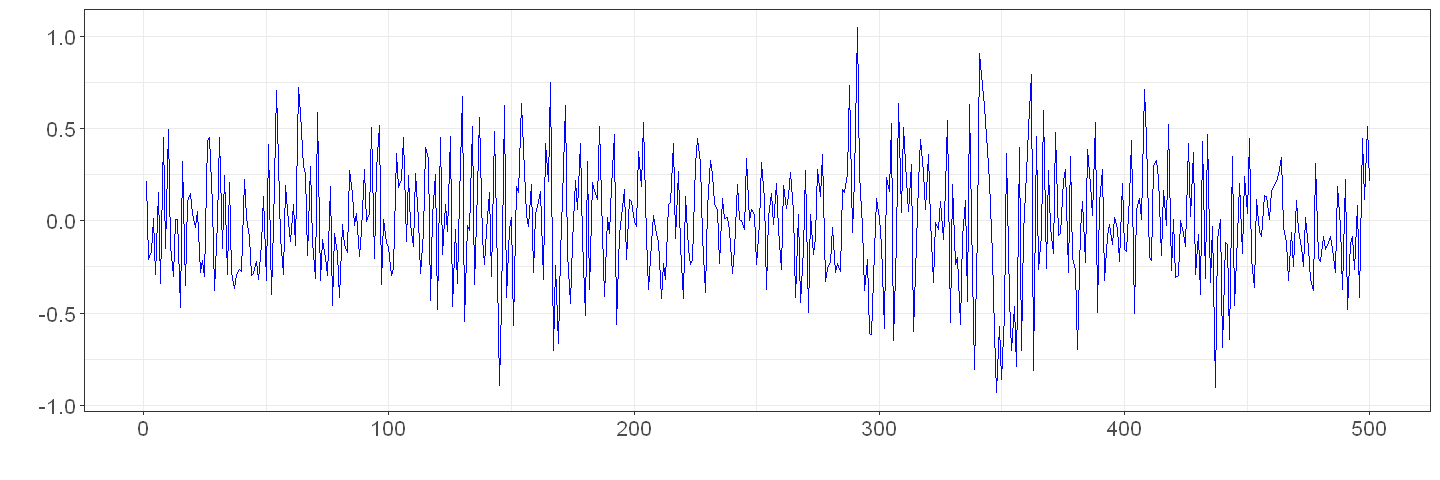

In [8]:
ggplot() + 
  geom_line(aes(x = 1:length(Y), y = Y), color="blue") + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

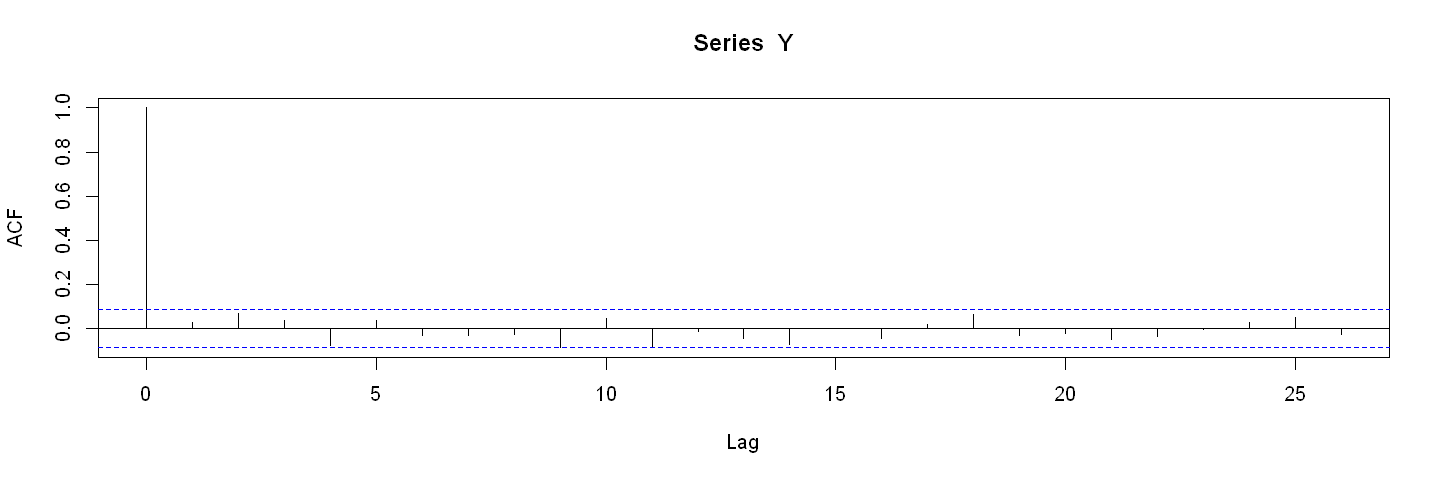

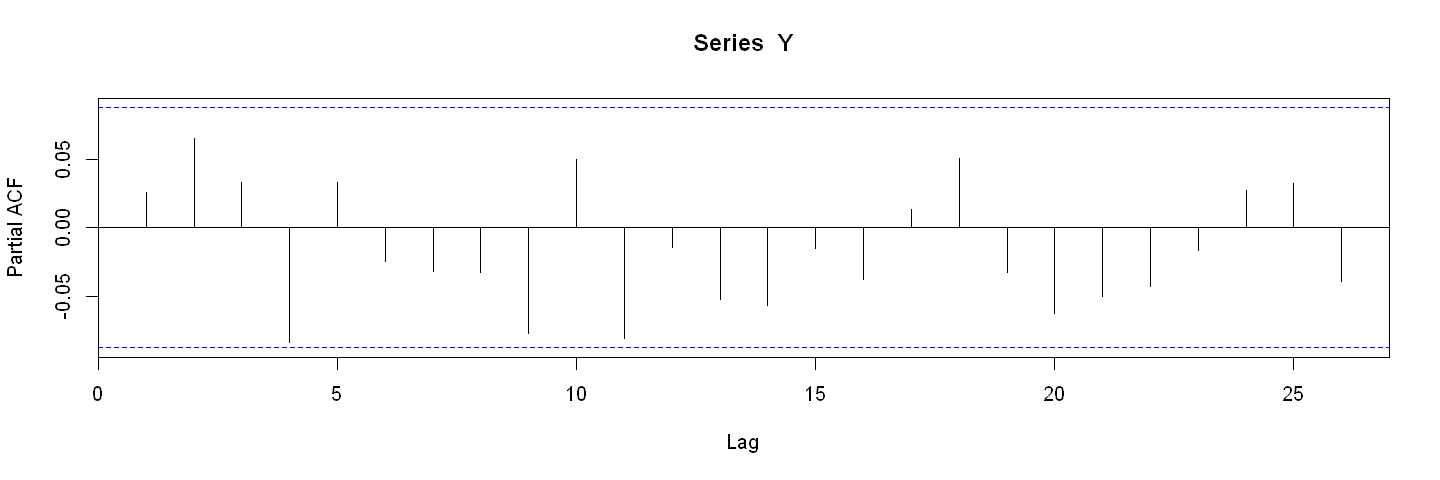

In [9]:
acf(Y)
pacf(Y)

In [10]:
eacf(Y)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x x o o o o o o o o  o  o  o 
5 x x x o o o o o o o o  o  o  o 
6 x o x o o x o o o o o  o  o  o 
7 x x o o x x x o o o o  o  o  o 


The data seems consistent with the assumption of white noise based on these tests.

**(a)**

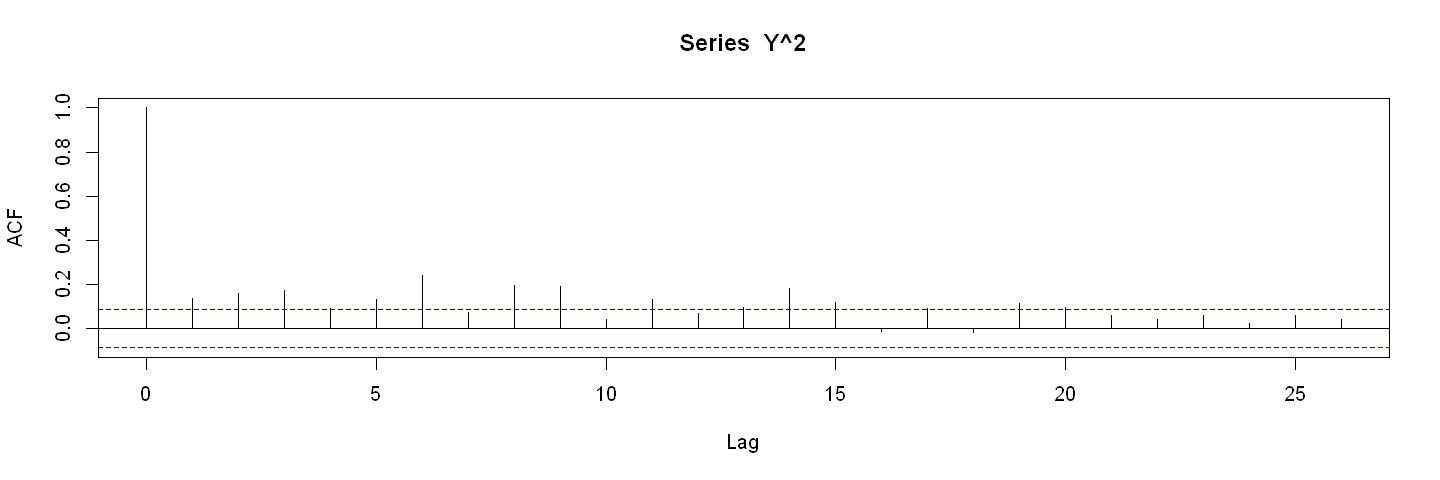

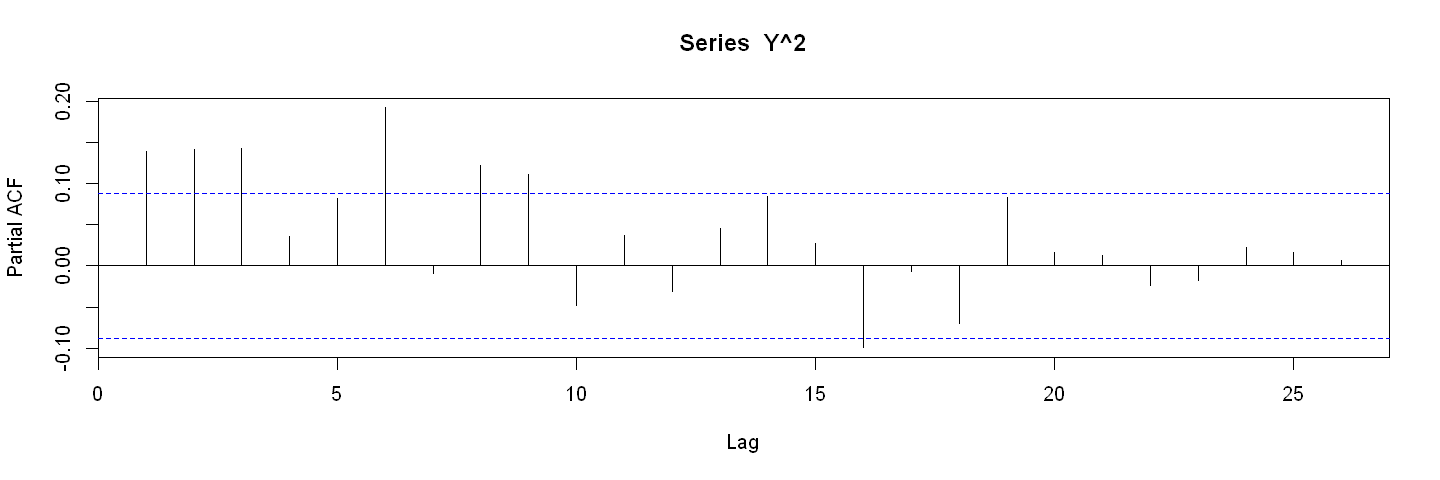

In [11]:
acf(Y**2)
pacf(Y**2)

In [12]:
eacf(Y**2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x o x x o x  o  x  x 
1 x o o o o x o o x o x  o  o  x 
2 x o o o o x x x x x o  o  o  o 
3 x x x o o o o o x x o  o  o  o 
4 x o x x o o o o x o o  o  o  o 
5 x o x x x o o o o o o  o  o  o 
6 o x x x x o o o o o o  o  o  o 
7 o x x x x o x o o o o  o  o  o 


ACF and PACF on the series of squares show many significant lags. EACF weakly suggests a ARMA(1, 1) model for the data, which suggests a GARCH(1, 1) model for the original data.

**(b)**

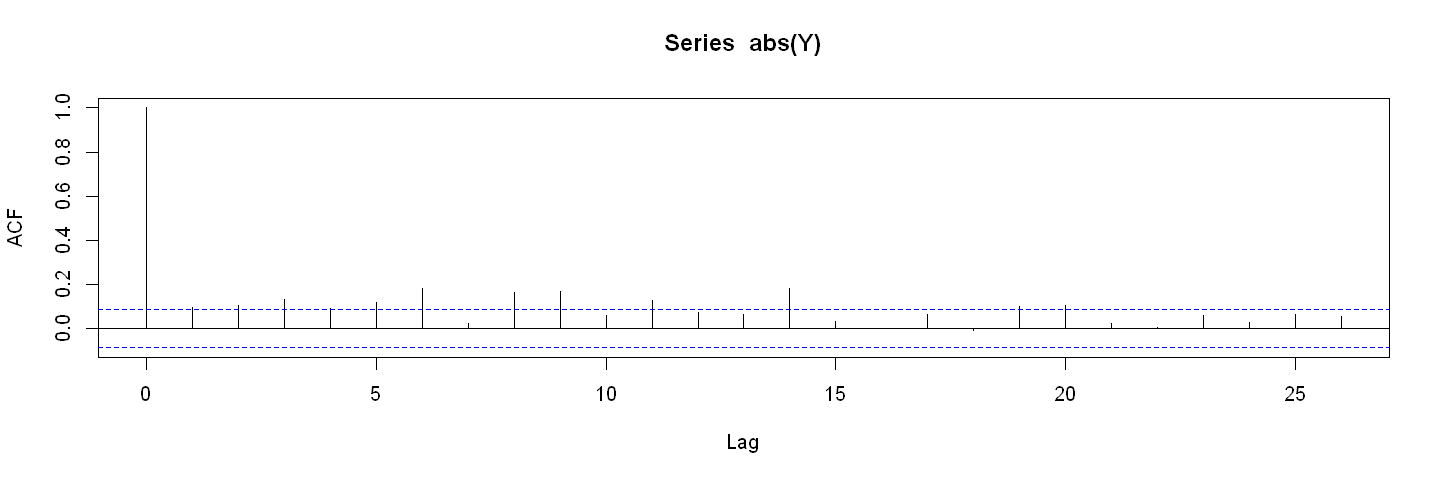

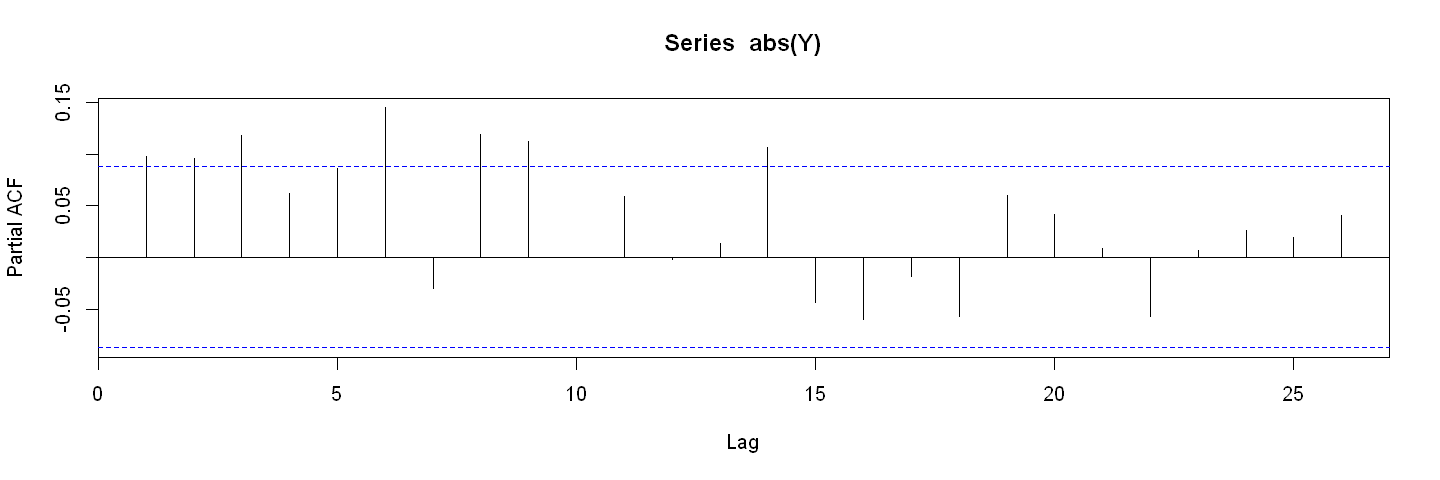

In [13]:
acf(abs(Y))
pacf(abs(Y))

In [14]:
eacf(abs(Y))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x o x x o x  o  o  x 
1 x o o o o x o o x o o  o  o  x 
2 x x o o o o x x x o o  o  o  x 
3 x x x o o o o o x o o  o  o  x 
4 x o x x o o o o o o o  o  o  x 
5 x o x o o o o o o o o  o  o  o 
6 x x x x x o o o o o o  o  o  o 
7 x x x x x o x o o o o  o  o  o 


ACF and PACF show many significant lags. EACF suggests an ARMA(1, 1) model for the absolute values, which suggests a GARCH(1, 1) model for the original series.

**(c)**

In [15]:
source('McLeod.Li.test.R')

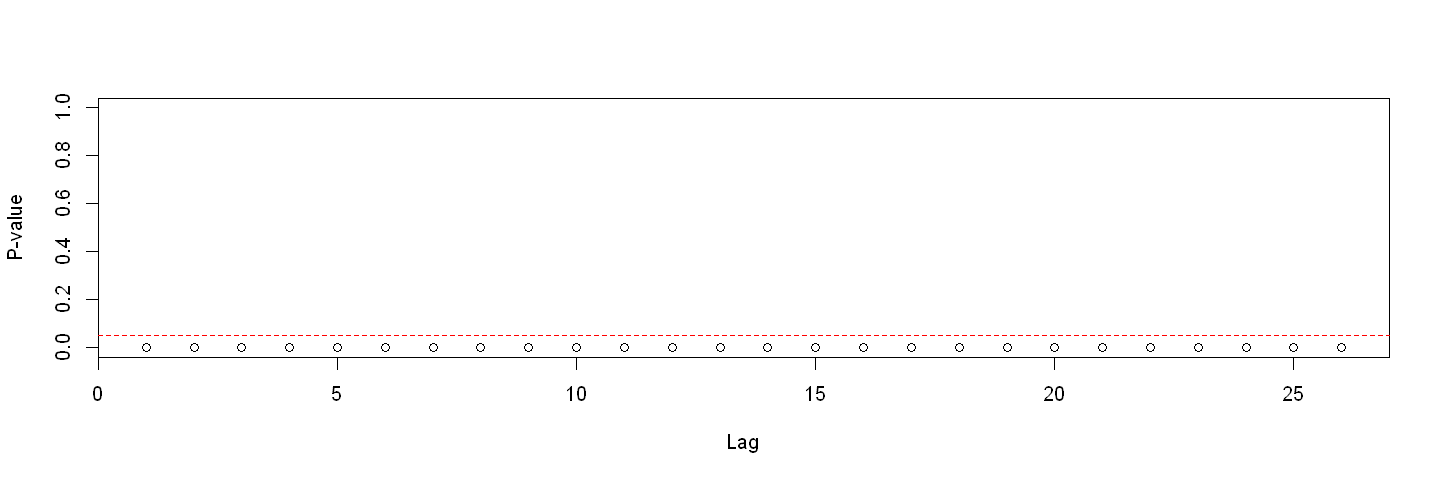

In [16]:
McLeod.Li.test(y=Y)

The McLeod Li test shows strong evidence of heteroscedascity.

**(d)**

In [17]:
Yr = Y[1:200]

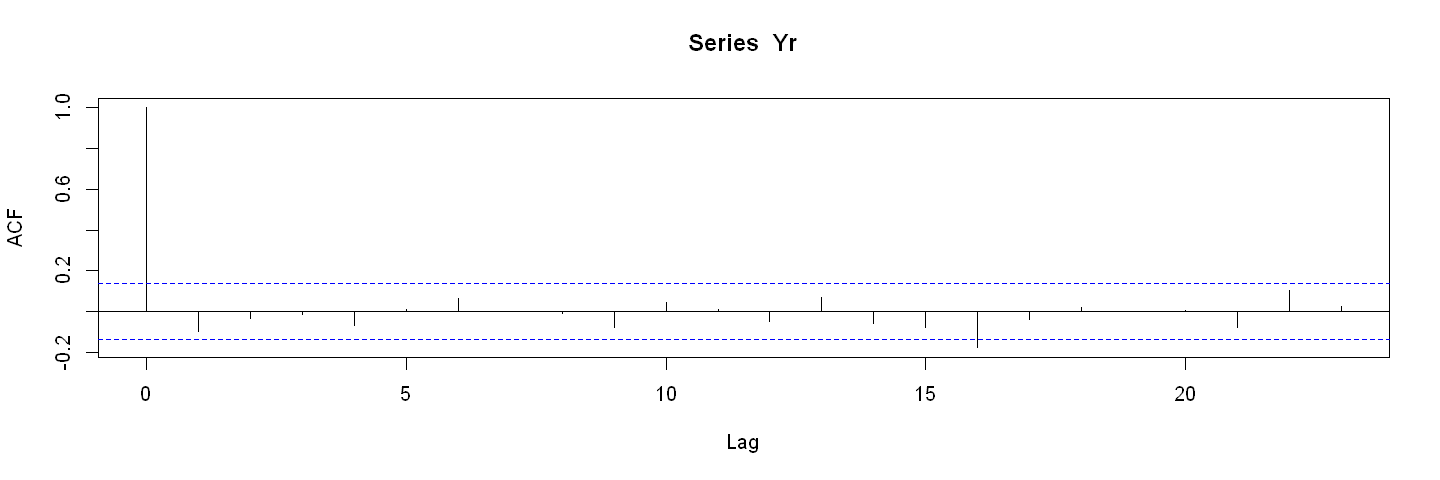

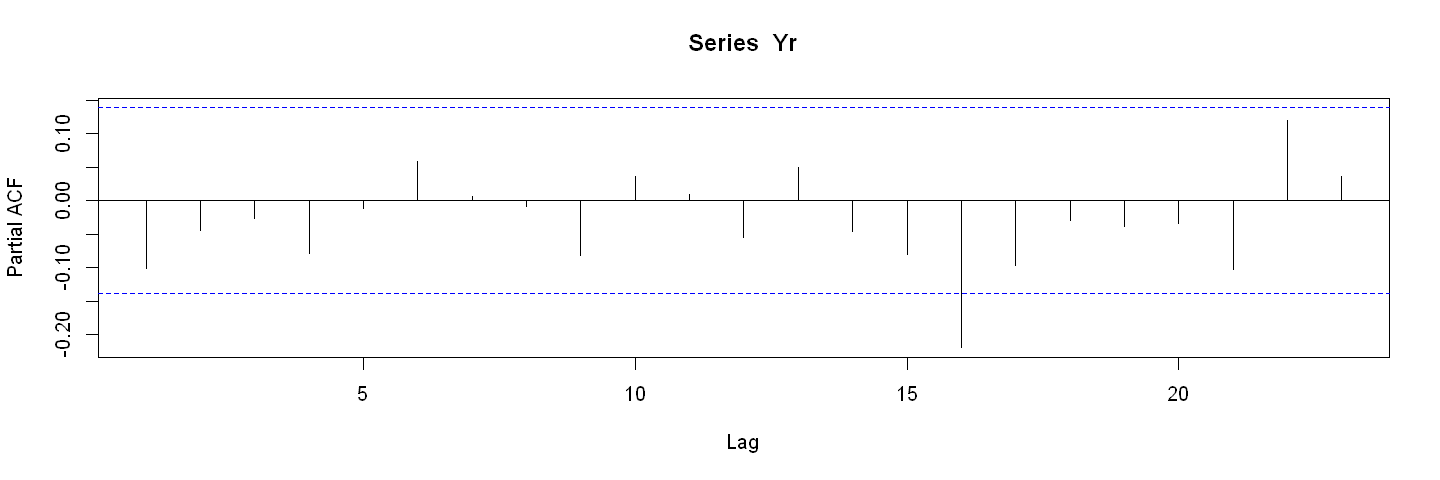

In [18]:
acf(Yr)
pacf(Yr)

In [19]:
eacf(Yr)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 o x x x o o o o o o o  o  o  o 
5 x x x o o o o o o o o  o  o  o 
6 o x x o x o o o o o o  o  o  o 
7 x o x o x o x o o o o  o  o  o 


PACF shows a significant coefficient at lag 2, but EACF weakly suggests a MA(3) model.

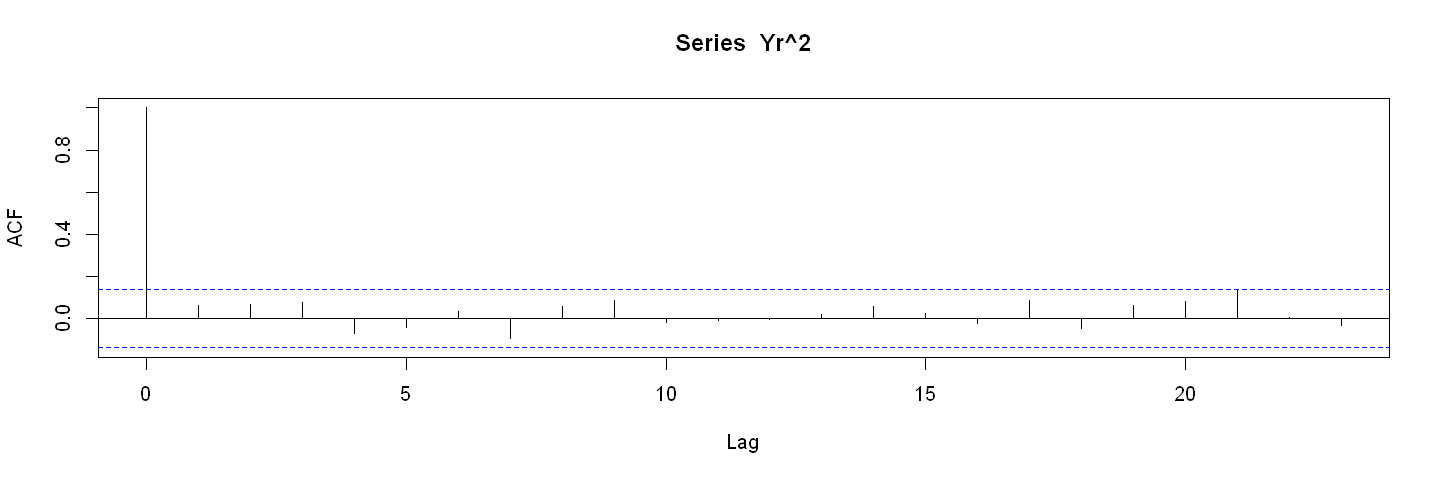

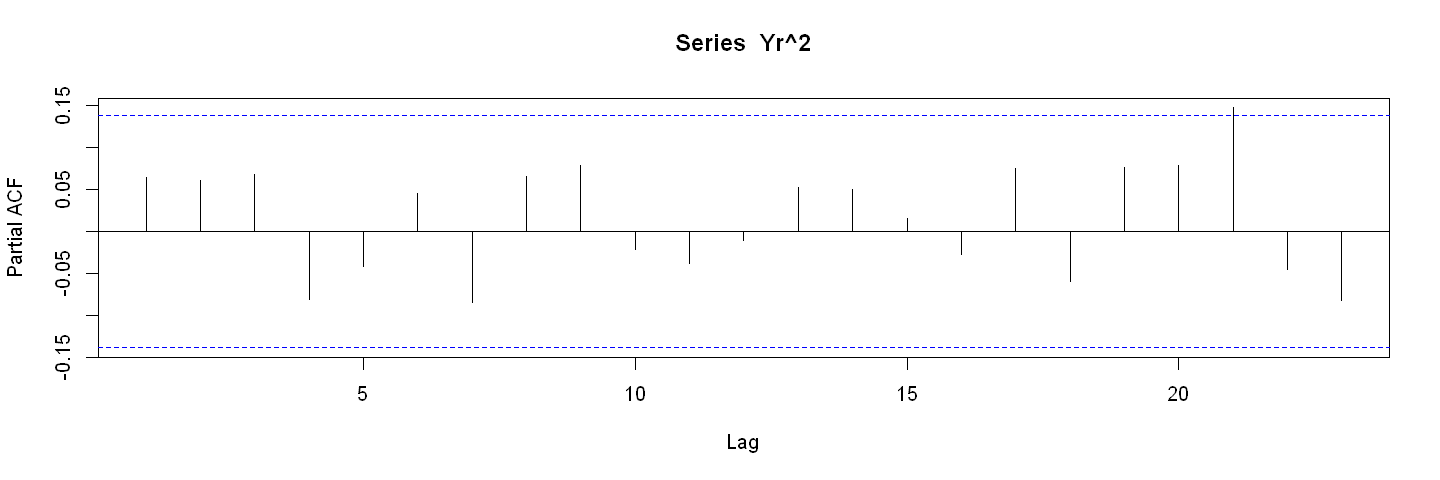

In [20]:
acf(Yr**2)
pacf(Yr**2)

In [21]:
eacf(Yr**2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  o  o 
5 x o x x o o o o o o o  o  o  o 
6 x x o x x o o o o o o  o  o  o 
7 x x o x x o x o o o o  o  o  o 


For the series of squares, PACF shows a coefficient significant at lag 2 (just above the threshold), but EACF suggests a white noise process.

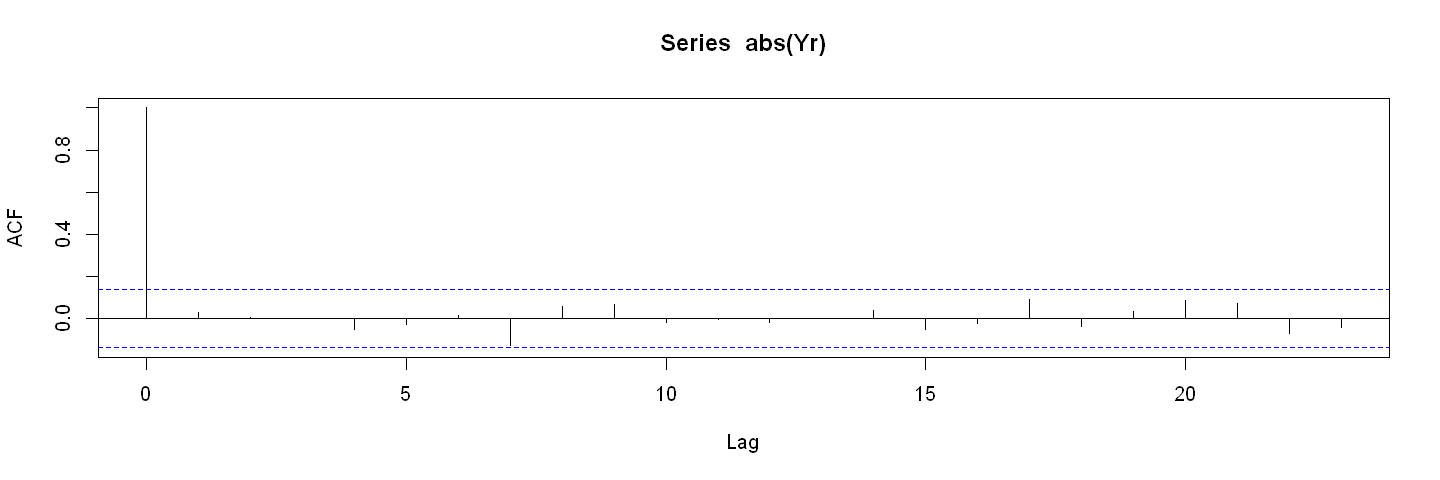

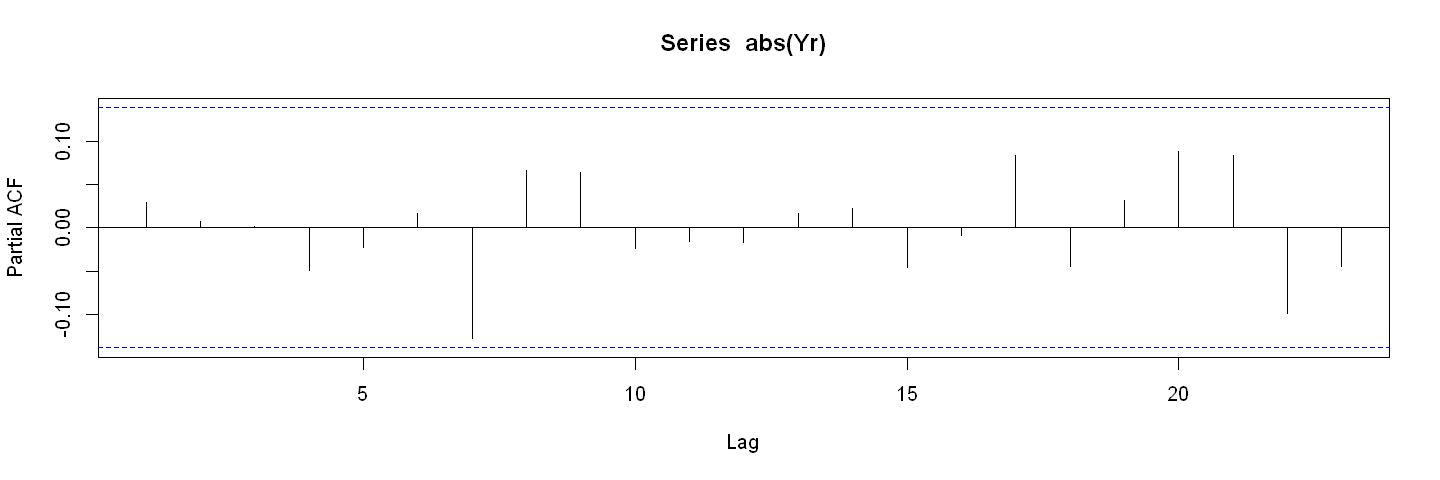

In [22]:
acf(abs(Yr))
pacf(abs(Yr))

In [23]:
eacf(abs(Yr))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 o o x o o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  o  o 
5 x o x o o o o o o o o  o  o  o 
6 o x x o o x o o o o o  o  o  o 
7 x x x x o o o o o o o  o  o  o 


For the absolute value of the series, no significant coefficients are shown, and EACF suggests a white noise process.

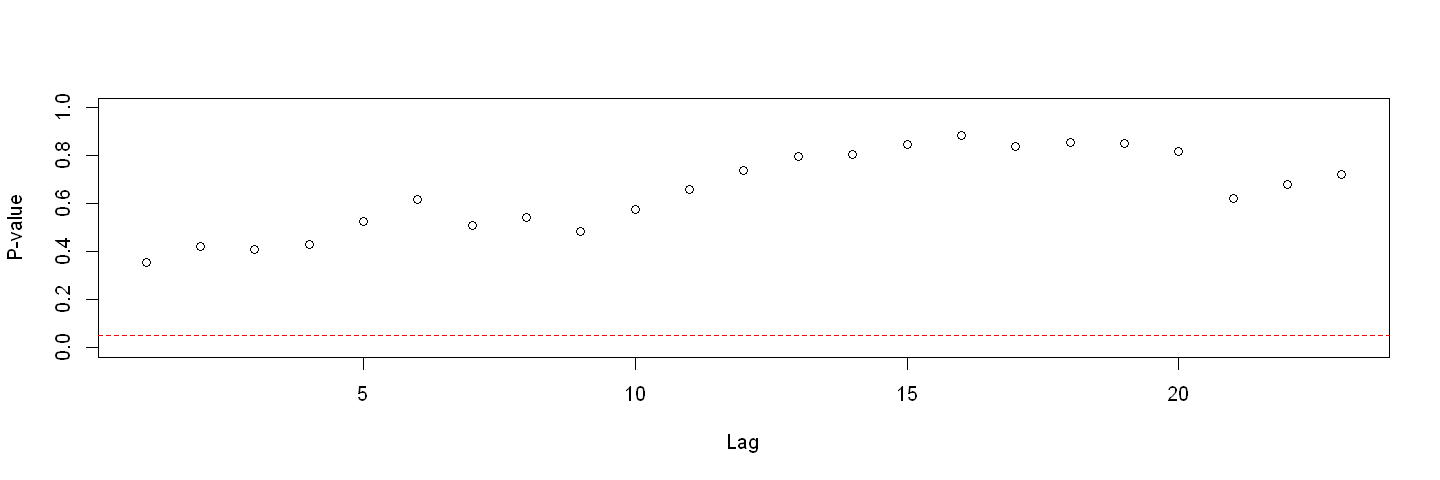

In [24]:
McLeod.Li.test(y=Yr)

The McLeod Li test fails to present evidence of heteroscedascity.

It seems that a series of size 200 is not sufficient to suggest the true model.

**Exercise 12.8**.  The file `cref.bond` contains the daily price of the CREF bond fund from August 26, 2004 to August, 15, 2006. These data are available only on trading days, but proceed to analyze the data as if they were sampled regularly. 

**(a)** Display the time sequence plot of the daily bond price data and comment on the main features in the data.

**(b)** Compute the daily bond returns by log-transforming the data and then computing the first differences of the transformed data. Plot the daily bond returns, and comment on the result.

**(c)** Perform the McLeod-Li test on the returns series. What do you conclude?

**(d)** Show that the returns of the CREF bond price series appear to be independently and identically distributed and not just serially uncorrelated; that is, there is no discernible volatility clustering.

**Solution**.

In [25]:
Y = fread('../data/cref.bond.dat')[['cref.bond']]

**(a)**

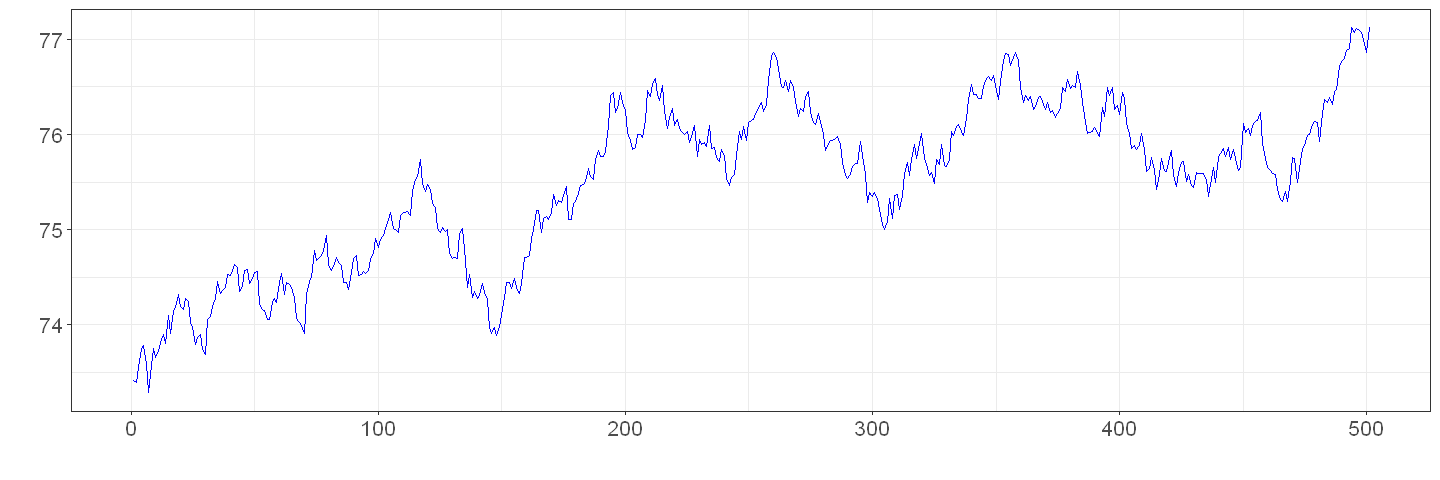

In [26]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(Y), y = Y), color="blue") + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The series appears to be a random walk.

**(b)**

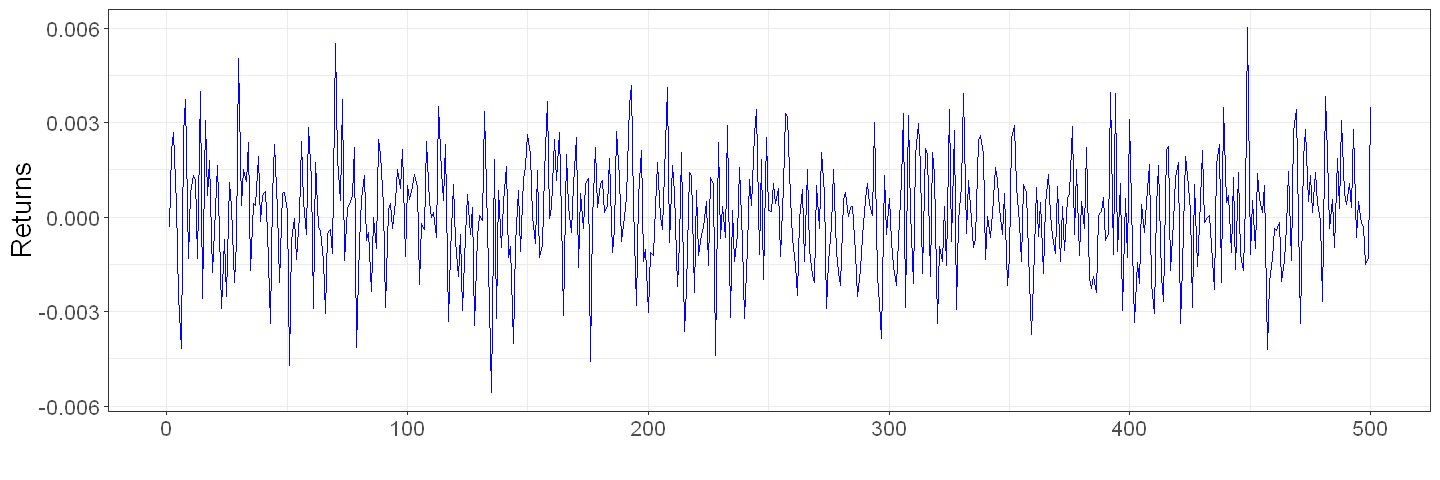

In [27]:
W = diff(log(Y))

options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(W), y = W), color="blue") + 
  xlab('') + ylab('Returns') +
  theme_bw() + theme(text = element_text(size=16))

The return series looks like white enoise -- with maybe a hint of heteroscedacity.

**(c)**

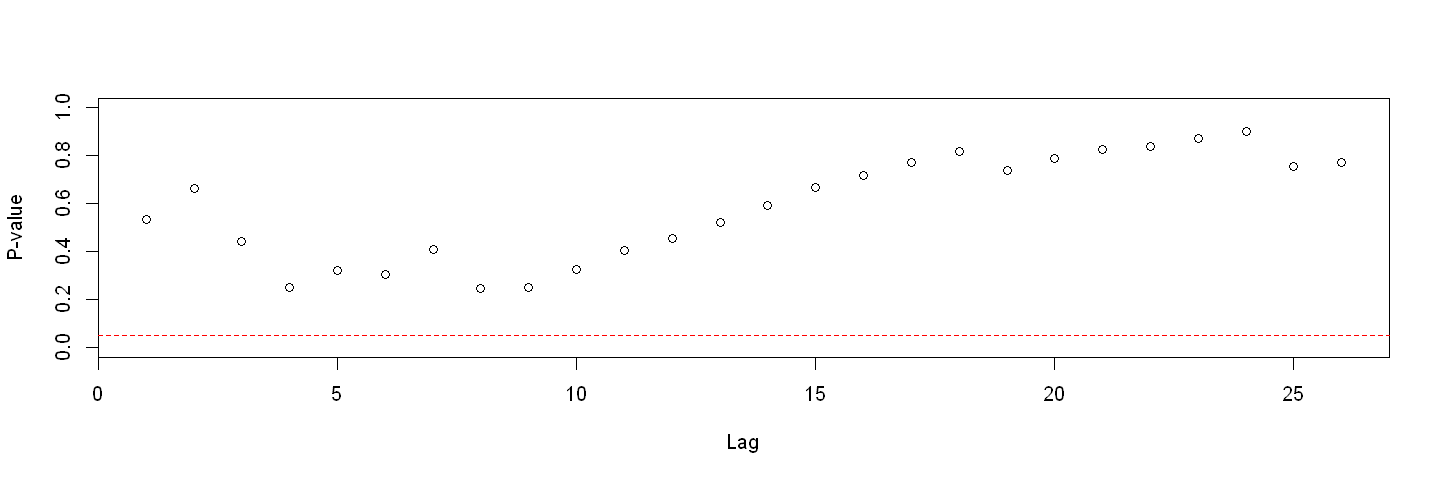

In [28]:
McLeod.Li.test(y=W)

The McLeod-Li test fails to reject no heteroscedacity.

**(d)**

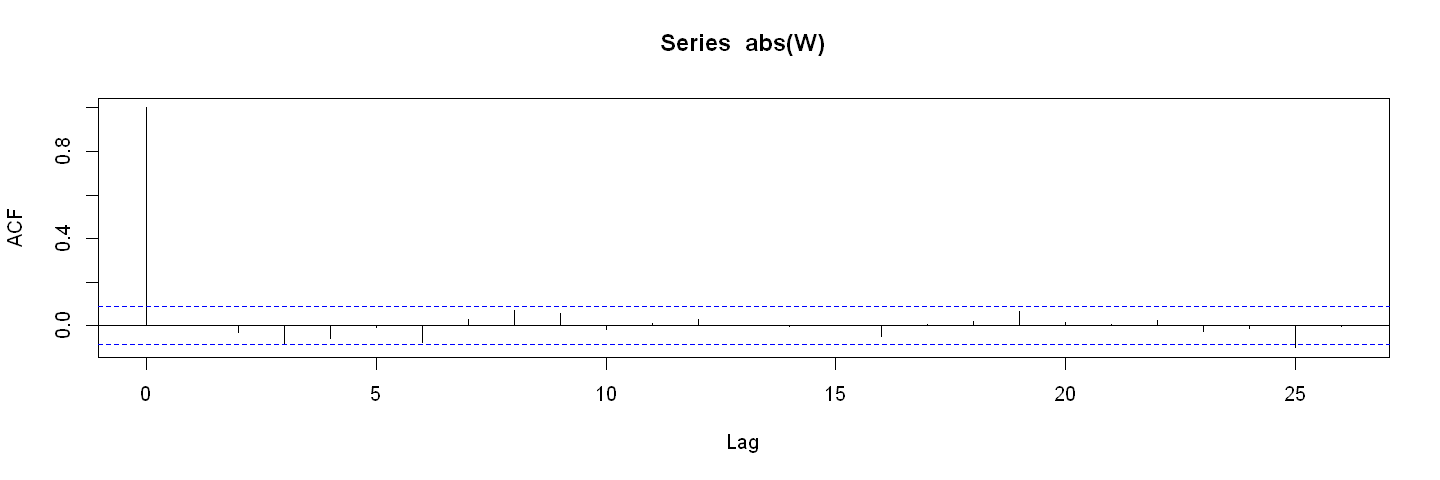

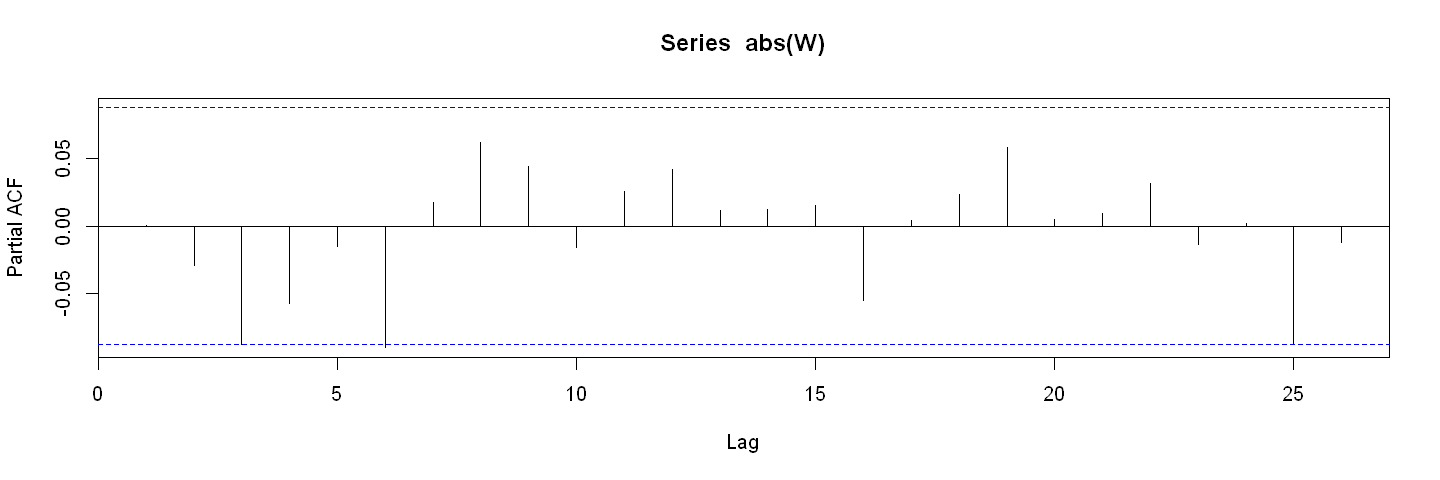

In [29]:
acf(abs(W))
pacf(abs(W))

In [30]:
eacf(abs(W))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 o o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x x x o x o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x x o x x o o o o o  o  o  o 
7 x x x o x o o o o o o  o  o  o 


ACF, PACF, and EACF suggest no autocorrelation on the absolute values of the returns.

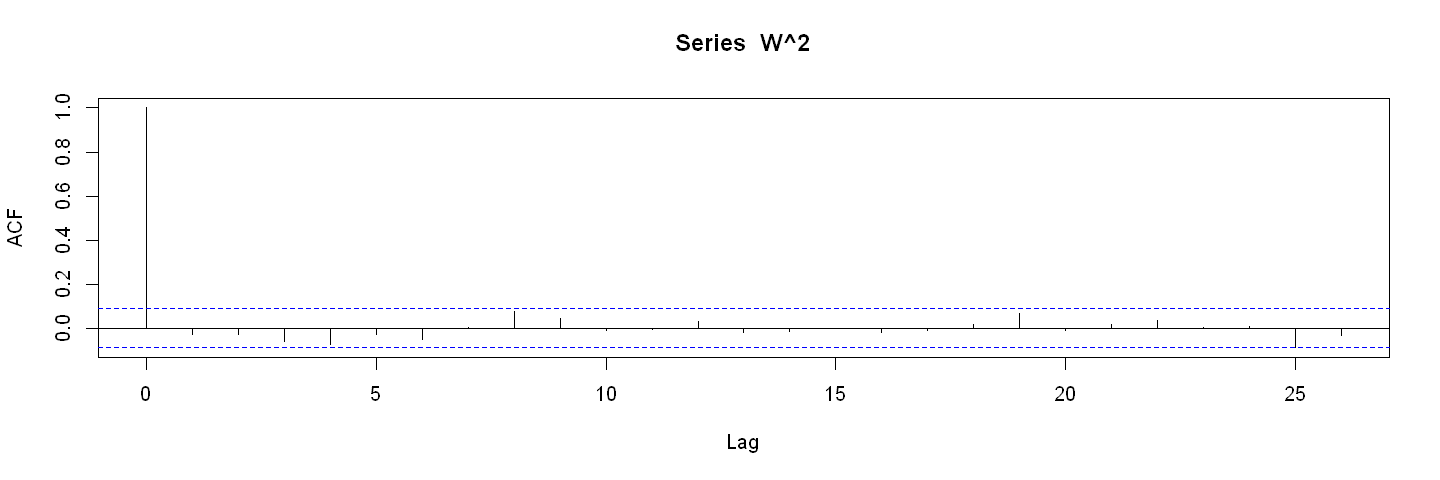

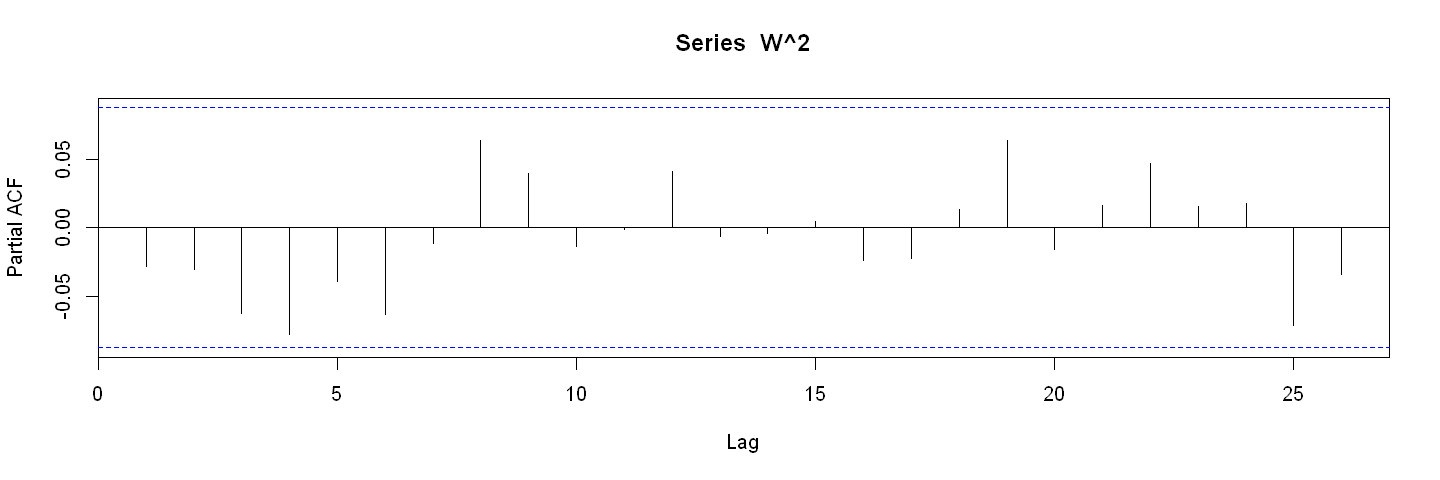

In [31]:
acf(W**2)
pacf(W**2)

In [32]:
eacf(W**2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x o x o o o o o o o  o  o  o 
5 x x o x o o o o o o o  o  o  o 
6 x x o x o x o o o o o  o  o  o 
7 x x x x o x o o o o o  o  o  o 


ACF, PACF, and EACF suggest no autocorrelation on the squared returns.

**Exercise 12.9**.  The daily returns of Google stock from August 20, 2004 to September 13, 2006 are stored in the file named `google`.

**(a)** Display the time sequence plot for the return data and show that the data are essentially uncorrelated over time.

**(b)** Compute the mean of the Google daily returns.  Does it appear to be significantly different from 0?

**(c)** Perform the McLeod-Li test on the Google daily returns series.  What do you conclude?

**(d)** Identify a GARCH model for the Google daily return data.  Estimate the identified model and perform model diagnostics with the fitted model.

**(e)** Draw and comment on the time sequence plot of the estimated conditional variances.

**(f)** Plot the QQ normal plot for the standardized residuals from the fitted model.  Do the residuals appear to be normal?  Discuss the effects of the normality on the model fit, for example, regarding the computation of the confidence interval.

**(g)** Construct a 95% confidence interval for b1.

**(h)** What are the stationary mean and variance according to the fitted GARCH model?  Compare them with those of the data.

**(i)** Based on the GARCH model, construct the 95% prediction intervals for h-step-ahead forecast, for $h = 1, 2, \dots, 5$.

**Solution**.

In [33]:
Y <- fread('../data/google.dat')[['google']]

**(a)**

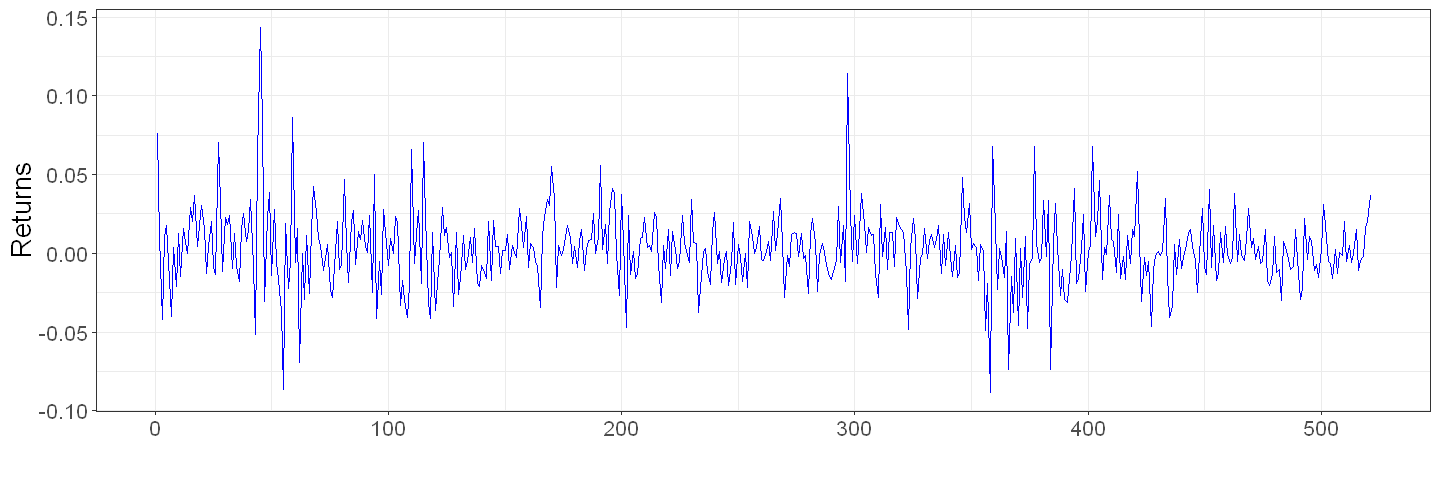

In [34]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(Y), y = Y), color="blue") + 
  xlab('') + ylab('Returns') +
  theme_bw() + theme(text = element_text(size=16))

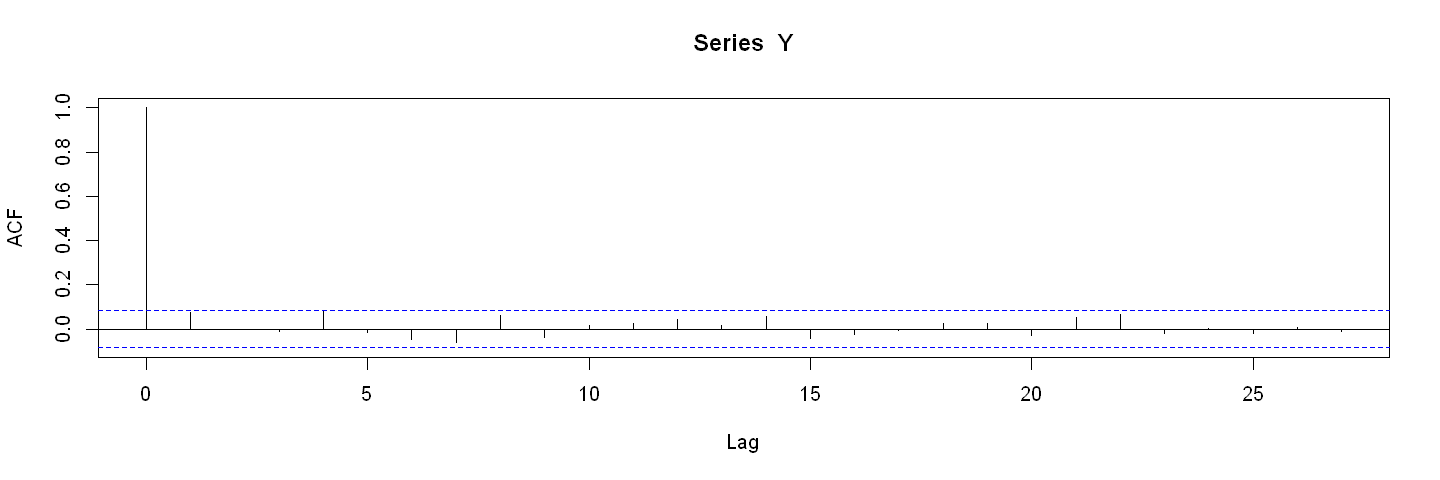

In [35]:
acf(Y)

The series seems uncorrelated over time.

**(b)**

In [36]:
t.test(Y, alternative='greater')


	One Sample t-test

data:  Y
t = 2.5689, df = 520, p-value = 0.00524
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.0009629671          Inf
sample estimates:
  mean of x 
0.002685589 


A t-test indicates that the mean, 0.00269, is significantly different from zero.

**(c)**

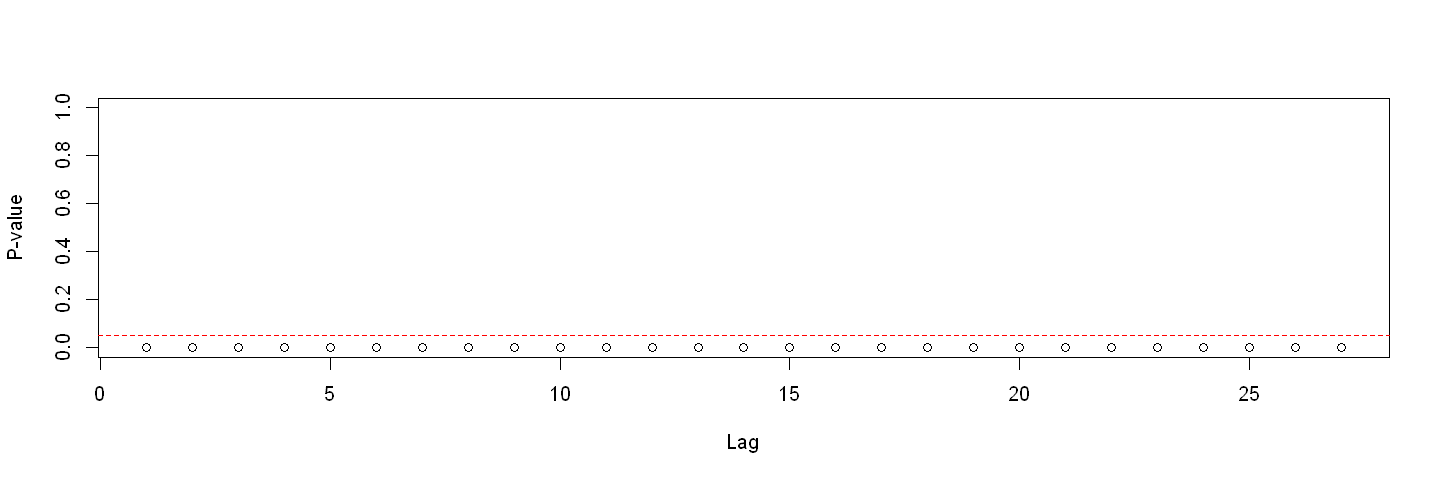

In [37]:
McLeod.Li.test(y=Y)

The McLeod-Li test suggests significant ARCH effects.

**(d)**

In [38]:
eacf(abs(Y))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x o o o x o o x o  o  x  x 
1 x o o o o o o o o o o  o  o  x 
2 x x o o o o o o o o o  o  o  x 
3 x x x o o o o o o o o  o  o  x 
4 x o x o o o o o o o o  o  o  o 
5 x o x o x o o o o o o  o  o  o 
6 o x x x x x o o o o o  o  o  o 
7 x o x x x o x o o o o  o  o  o 


In [39]:
eacf(Y**2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o x o  o  o  x 
1 x o o o o o o o o x o  o  o  x 
2 x o o o o o o o o x o  o  o  x 
3 x x x o o o o o o x o  o  o  x 
4 x x x o o o o o o o o  o  o  o 
5 x x x o o o o o o o o  o  o  o 
6 x x x x o o o o o o o  o  o  o 
7 o x x o o x o o o o o  o  o  o 


The EACF on the absolute returns and for the squared returns suggest an ARMA(1, 1) model, which suggests a GARCH(1, 1) model for the original return series.

In [40]:
model = garch(x=Y-mean(Y), order=c(1,1), trace=FALSE)
summary(model)


Call:
garch(x = Y - mean(Y), order = c(1, 1), trace = FALSE)

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.60759 -0.59916 -0.04721  0.54561  5.56382 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 5.246e-05   1.276e-05    4.111 3.93e-05 ***
a1 1.398e-01   2.335e-02    5.985 2.17e-09 ***
b1 7.697e-01   3.722e-02   20.680  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 201.23, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.011104, df = 1, p-value = 0.9161


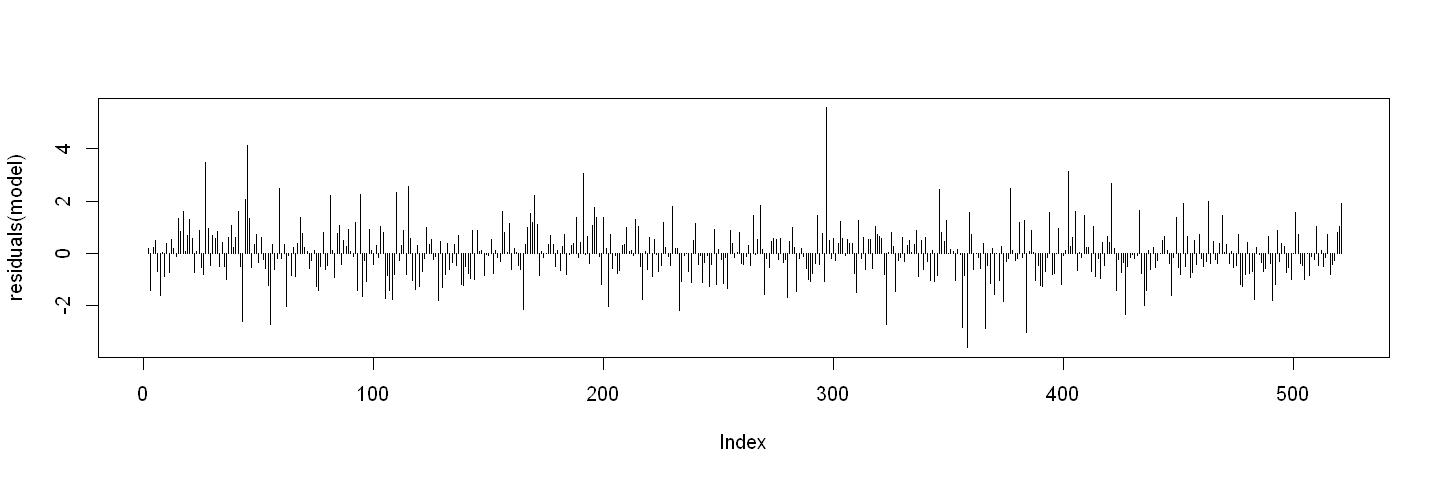

In [41]:
plot(residuals(model), type='h')

All coefficients are significant, and the residuals show no particular tendency.

In [42]:
source('gBox.R')

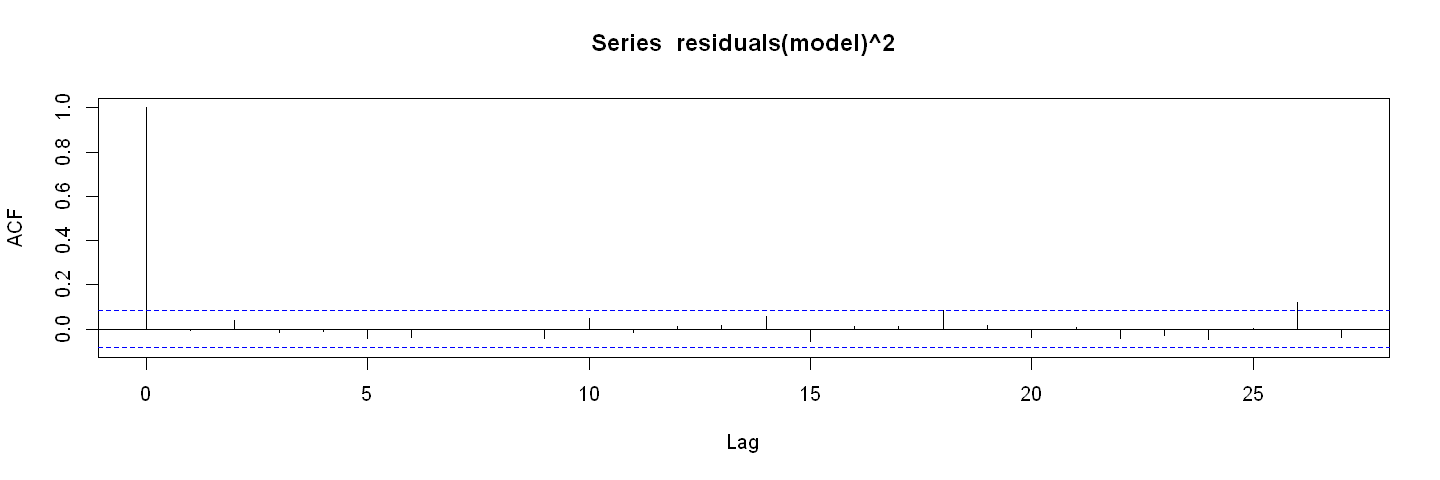

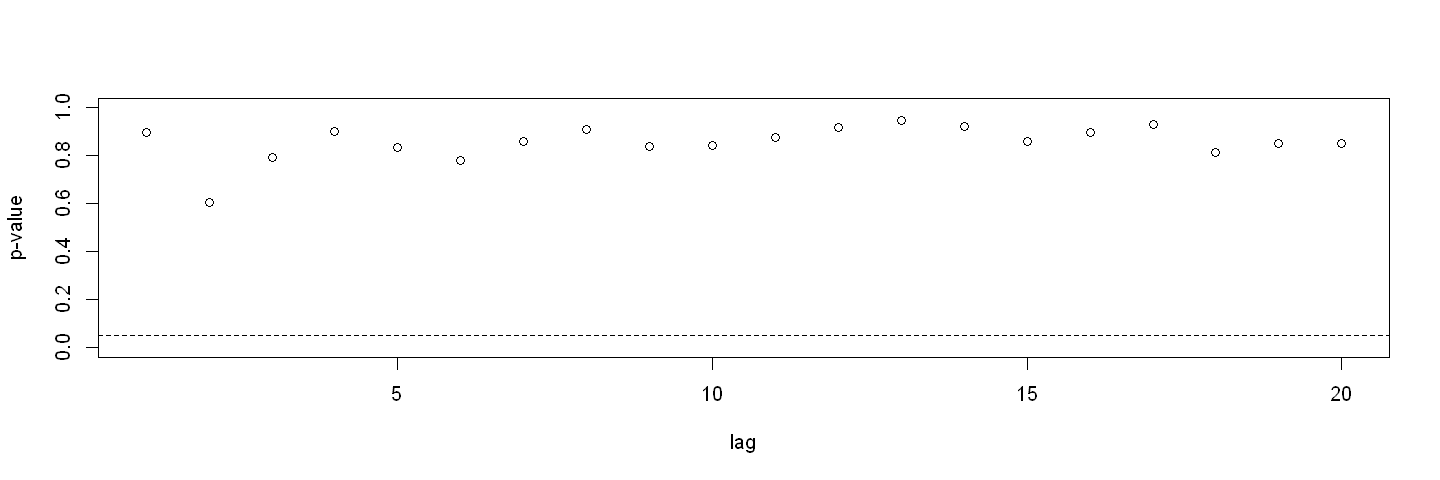

In [43]:
acf(residuals(model)^2, na.action=na.omit)
gBox(model, method='squared')

The squared returns show no correlated residuals, and the generalized portmanteu test suggests they are uncorrelated over time.

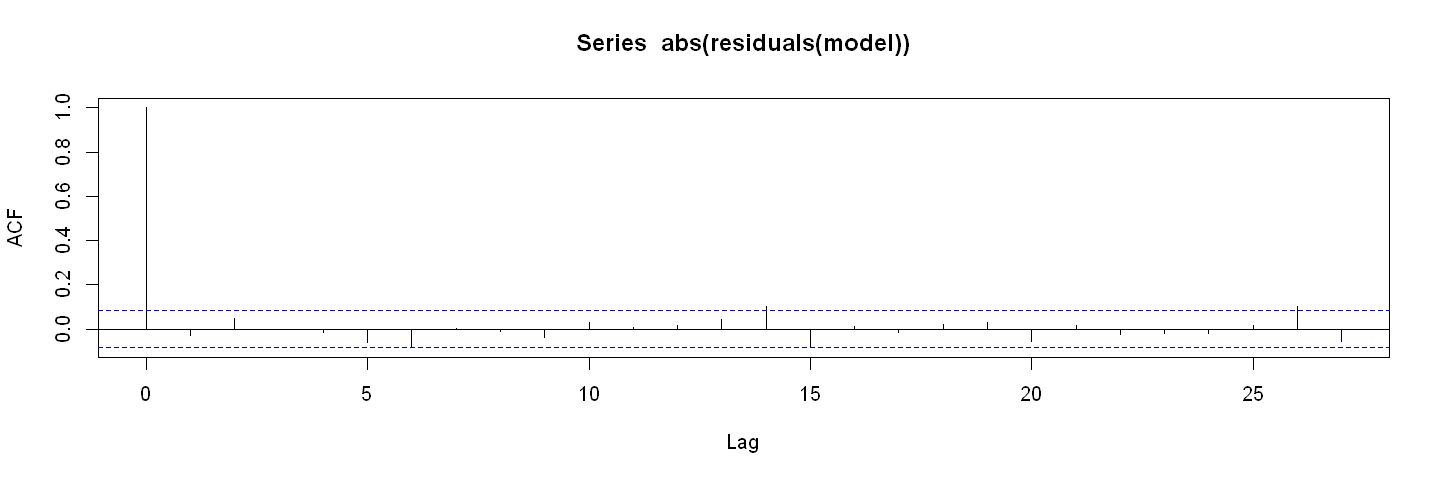

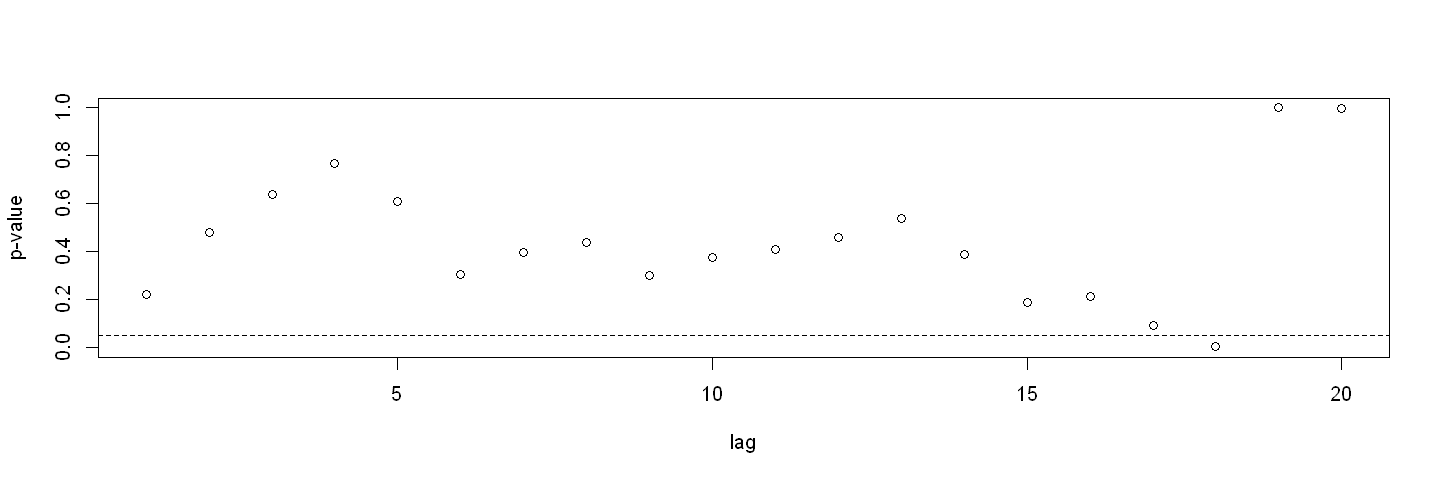

In [44]:
acf(abs(residuals(model)), na.action=na.omit)
gBox(model, method='absolute')

Similar results are obtained for the absolute returns.

**(e)**

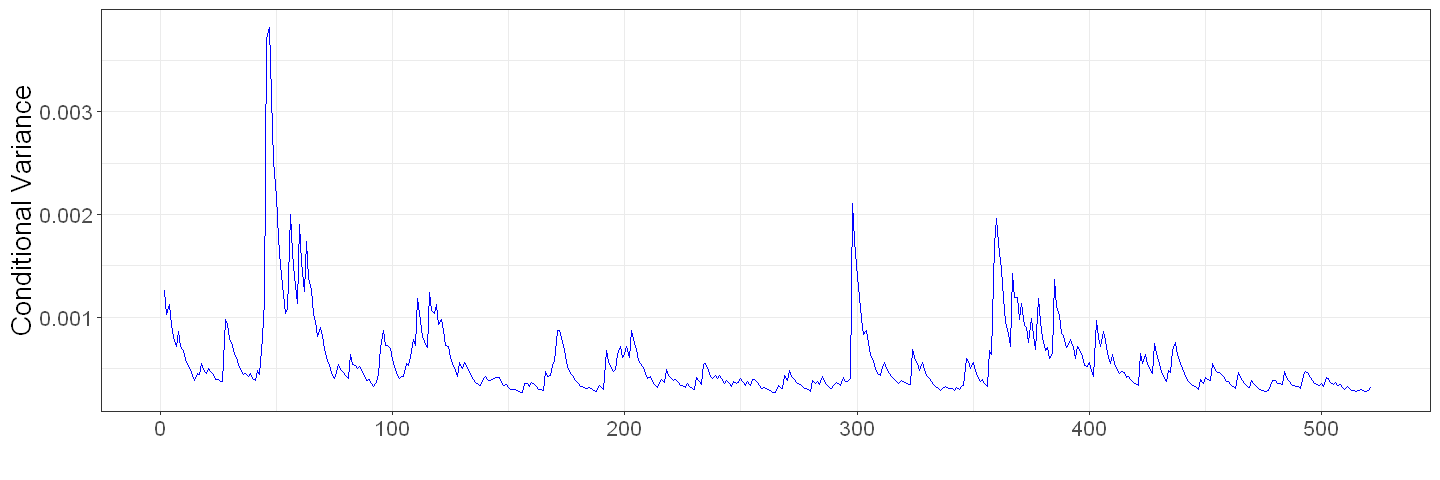

In [45]:
conditional_variance <- fitted(model)[, 1]^2

ggplot() + 
  geom_line(aes(x = 1:length(conditional_variance), y = conditional_variance), color="blue", na.rm=TRUE) + 
  xlab('') + ylab('Conditional Variance') +
  theme_bw() + theme(text = element_text(size=16))

The conditional variance presents volatility clustering and decay back to a long term value, as expected from a GARCH(1, 1) process.

In [46]:
mean(conditional_variance, na.rm=TRUE)

[1] 0.0005737238

**(f)**

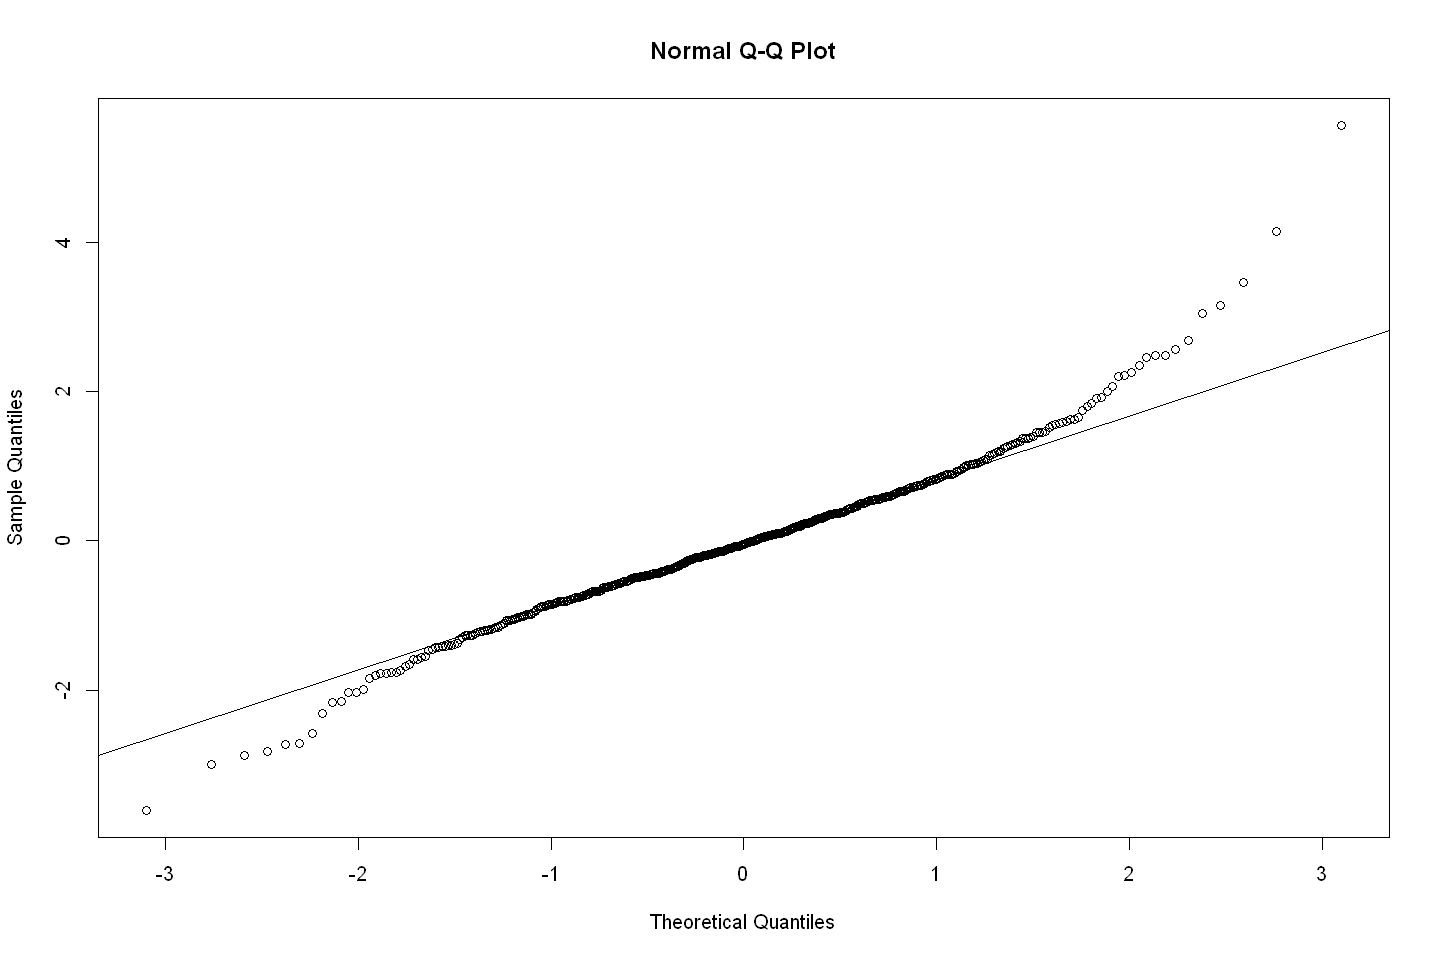

In [47]:
options(repr.plot.width=12, repr.plot.height=8)

qqnorm(residuals(model)); qqline(residuals(model))

The residuals present heavier tails on both sides.

**(g)**  The 95% confidence interval for $b_1$ is $\hat{b}_1 \pm z_{\alpha/2} \sqrt{\text{Var}[\hat{b}_1]}$:

In [48]:
b1_hat = model$coef['b1'] 
se_b1_hat = sqrt(model$vcov[3, 3])
z = qnorm(0.975)

print(round(b1_hat - z * se_b1_hat, 4))
print(round(b1_hat + z * se_b1_hat, 4))

    b1 
0.6968 
    b1 
0.8427 


The confidence interval is 0.6968 to 0.8427.

**(h)**  According to the GARCH(1, 1) model, the stationary variance is

$$ \frac{\hat{\omega}}{1 - \hat{\alpha} - \hat{\beta}} \approx 5.796\text{e-}04 $$

In [49]:
omega_hat = model$coef['a0']
alpha_hat = model$coef['a1']
beta_hat = model$coef['b1']

omega_hat / (1 - alpha_hat - beta_hat)

a0 
0.0005796118

which is close to the variance of the raw data, 5.694e-04:

In [50]:
var(Y)

[1] 0.0005693958

The stationary mean of the mean plus GARCH(1, 1) model is the same as the stationary mean of the returns itself, 0.002686:

In [51]:
mean(Y)

[1] 0.002685589

**(i)**  We can use Monte-Carlo simulations to estimate the prediction interval distributions.

In [52]:
mean.r = mean(Y)
nrepl = 10000
returnm = NULL
step = 5

set.seed(0)

sigma2.lag1.initial = tail(conditional_variance, n=1)
sq.return.lag1.initial = tail(Y, n=1)**2

# outer loop that replicated the simulation nrepl times
for (j in 1:nrepl) {
    returnv = NULL
    
    sigma2.lag1 = sigma2.lag1.initial
    sq.return.lag1 = sq.return.lag1.initial
    
    # inner loop simulate from the 1 to 5 step ahead predictive distributions
    for (i in 1:step) {
        
        # compute sigma^2_{t|t-1} recursively
        sigma2 = omega_hat + beta_hat * sigma2.lag1 + alpha_hat * sq.return.lag1
        
        # draw a realization from the i-step ahead distribution
        new.return = rnorm(1, mean=0, sd=sqrt(sigma2))
        
        returnv = c(returnv, new.return)
        sigma2.lag1 = sigma2
        sq.return.lag1 = new.return^2
    }
    
    returnm = cbind(returnm, returnv)
}

returnm = returnm + mean.r

apply(returnm, 1, function(x) { quantile(x, c(.025, .975)) })

2.5%,-0.04099271,-0.04158232,-0.04163208,-0.04087476,-0.04137534
97.5%,0.04641947,0.04608772,0.04721186,0.04707382,0.04772614


The estimated 95% confidence interval for the 5th prediction is (-0.0414, 0.0477).

**Exercise 12.10**. In Exercise 11.21 on page 276, we investigated the existence of outliers with the logarithms of monthly oil prices within the framework of an IMA(1,1) model. Here, we explore the effects of "outliers" on the GARCH specification. The data are in the file named `oil.price`.

**(a)** Based on the sample ACF, PACF, and EACF of the absolute and squared residuals from the fitted IMA(1,1) model (without outlier adjustment), show that a GARCH(1,1) model may be appropriate for the residuals.

**(b)** Fit an IMA(1,1) + GARCH(1,1) model to the logarithms of monthly oil prices.

**(c)** Draw the time sequence plot for the standardized residuals from the fitted IMA(1,1) + GARCH(1,1) model. Are there any outliers?

**(d)** For the log oil prices, fit an IMA(1,1) model with two IOs at $t = 2$ and $t = 56$ and an AO at $t = 8$. Show that the residuals from the IMA plus outlier model appear to be independently and identically distributed and not just serially uncorrelated; that is, there is no discernible volatility clustering.

**(e)** Between the outlier and the GARCH model, which one do you think is more appropriate for the oil price data? Explain your answer.

**Solution**.

In [53]:
Y <- log(fread('../data/oil.price.dat')[['oil.price']])

**(a)**

In [54]:
model_m1 = arima(Y, c(0, 1, 1))
print(model_m1)
coeftest(model_m1)


Call:
arima(x = Y, order = c(0, 1, 1))

Coefficients:
         ma1
      0.2956
s.e.  0.0693

sigma^2 estimated as 0.006689:  log likelihood = 260.29,  aic = -516.58



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)    
ma1 0.295600   0.069347  4.2626 2.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [55]:
std_resid <- model_m1$residuals / model_m1$sigma2

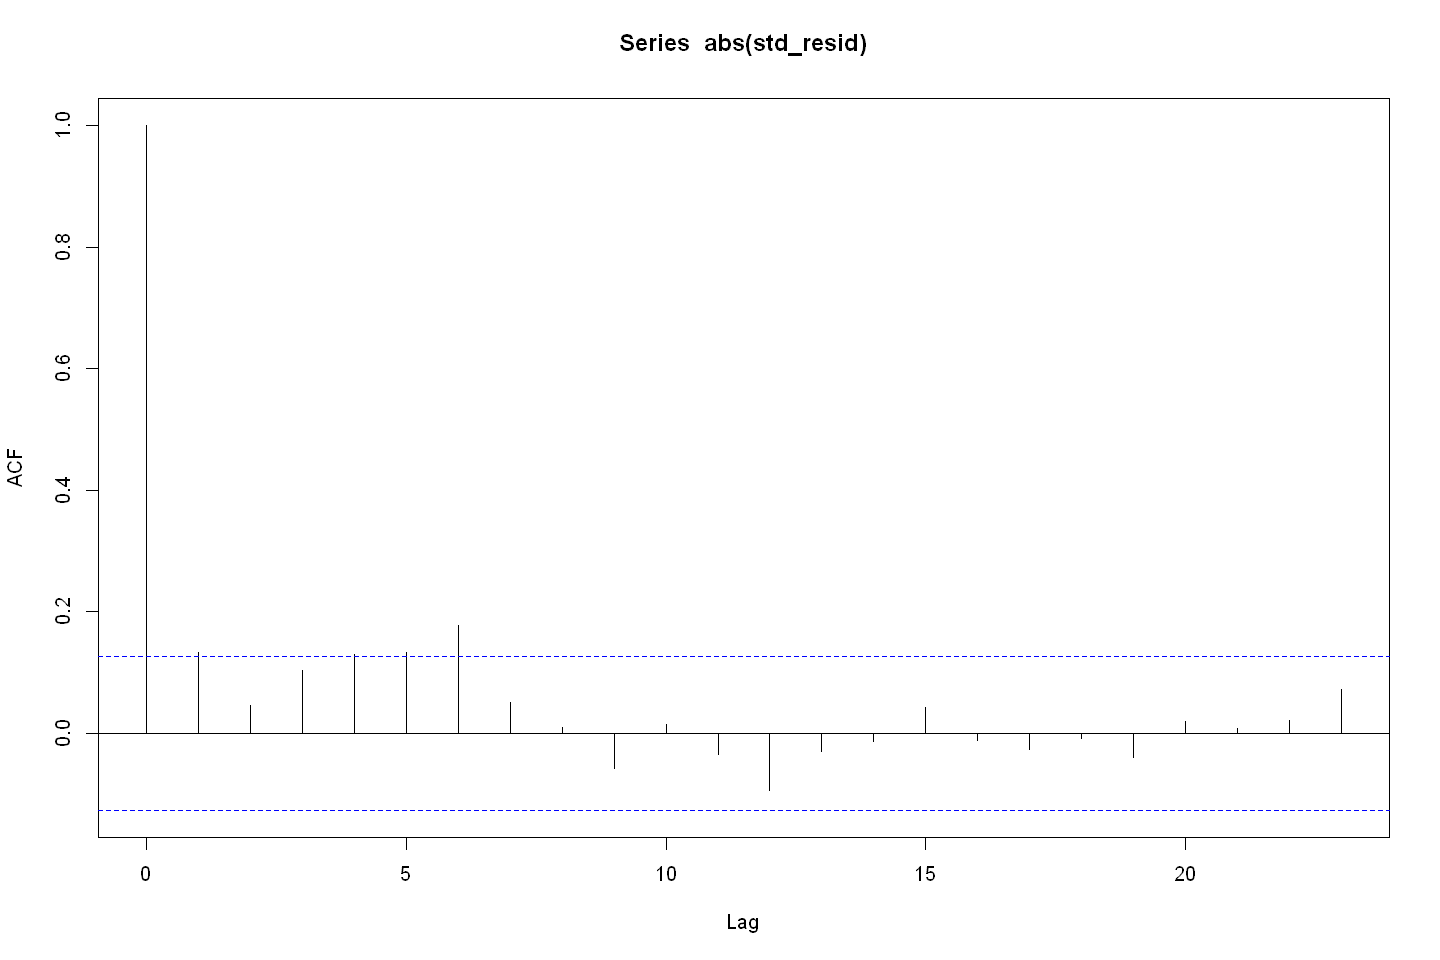

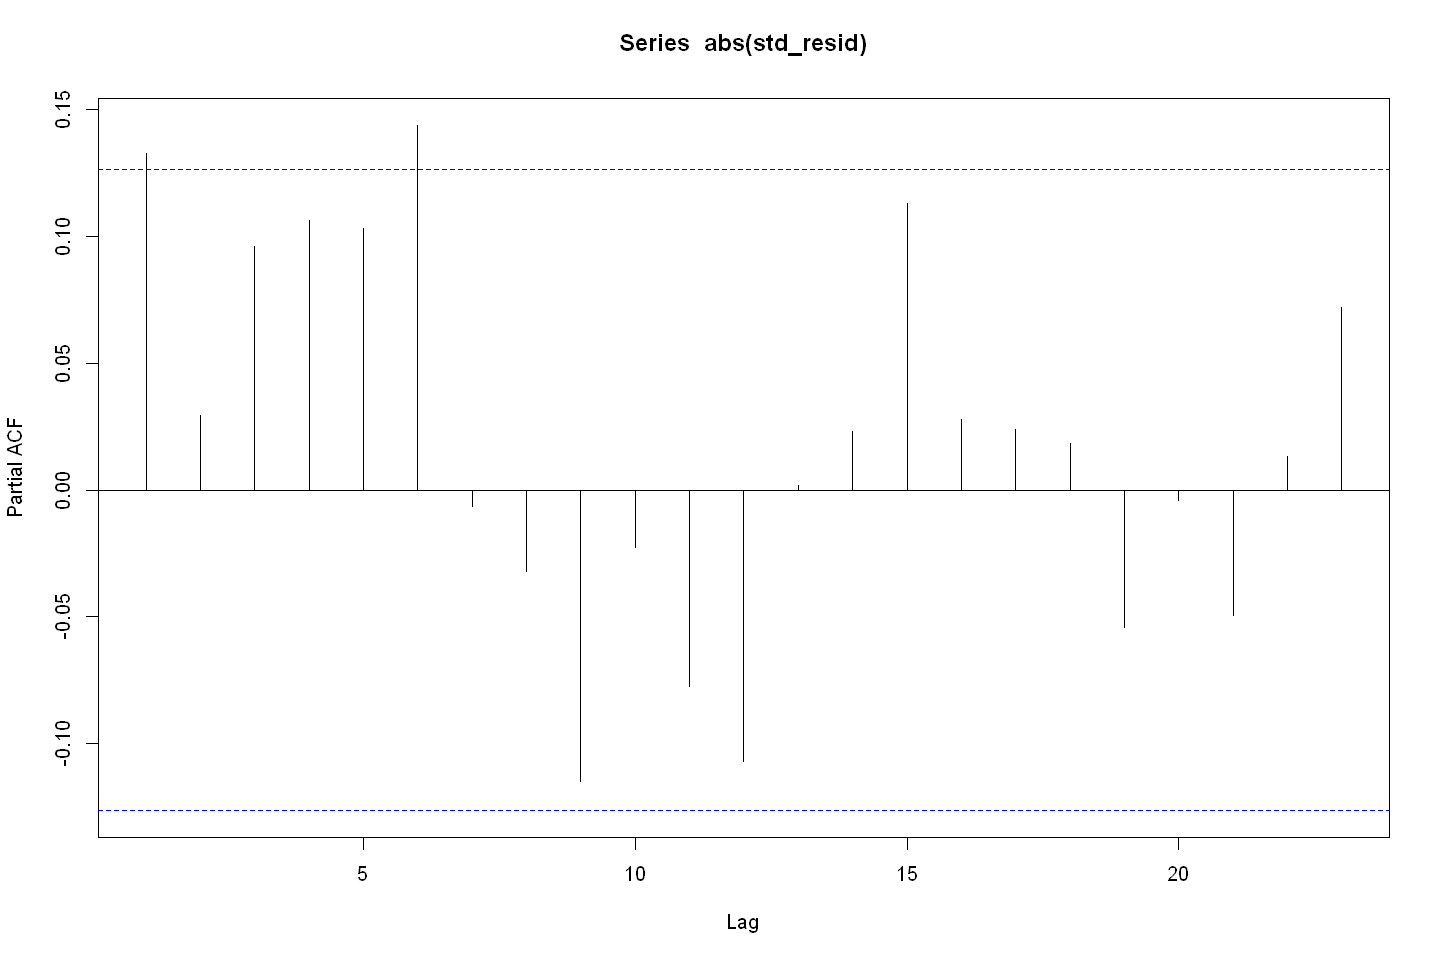

In [56]:
acf(abs(std_resid))
pacf(abs(std_resid))

In [57]:
eacf(abs(std_resid))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o x x o o o o o  o  o  o 
1 x o o o o x o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x x o x o o o o o o o  o  o  o 
5 x x x x o o o o o o o  o  o  o 
6 o o o o o o o o o o o  o  o  o 
7 o o o x o o o o o o o  o  o  o 


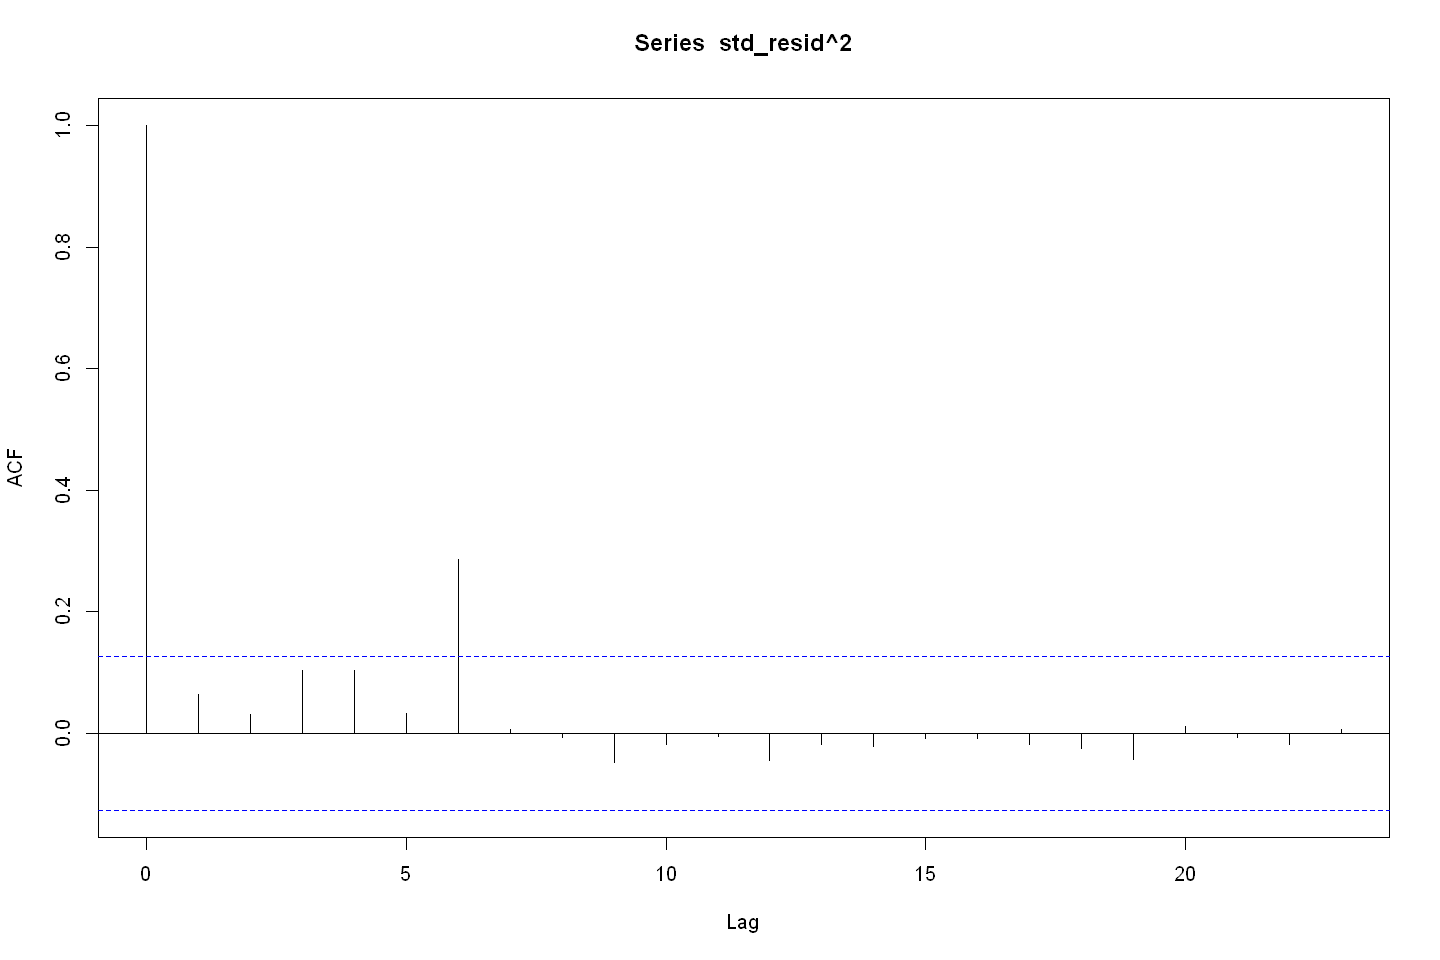

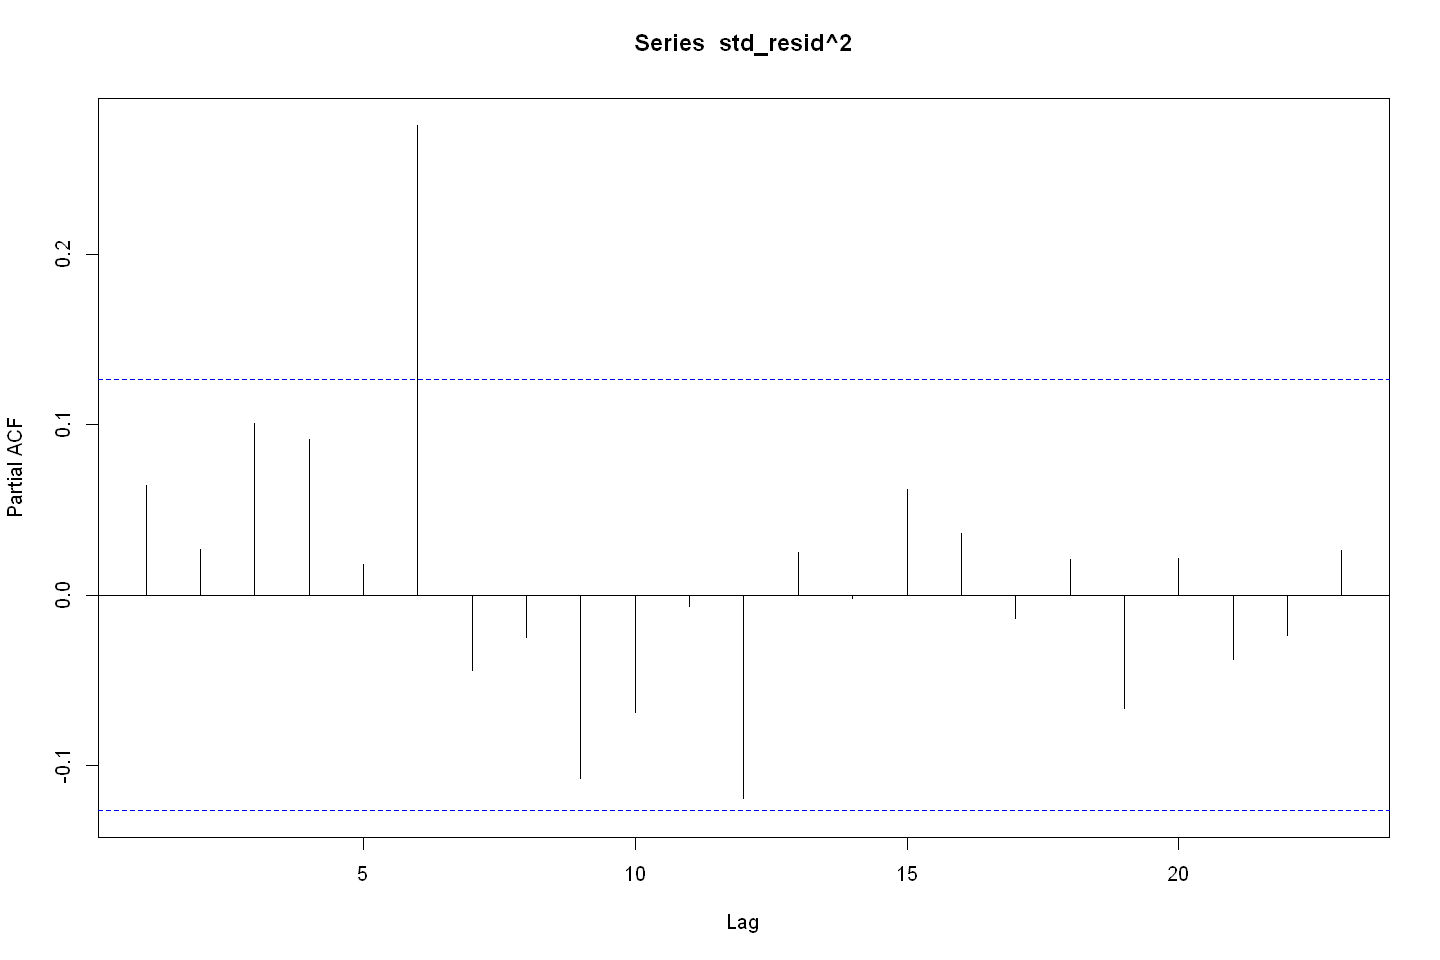

In [58]:
acf(std_resid**2)
pacf(std_resid**2)

In [59]:
eacf(std_resid**2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o x o o o o o  o  o  o 
1 x o o o o x x o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 o x x o x o o o o o o  o  o  o 
6 x o x x o x o o o o o  o  o  o 
7 x o x o o x o o o o o  o  o  o 


The plots point towards some correlation on the residuals -- and so we should try a GARCH(1, 1) model before trying other, more complex models.

**(b)**

In [60]:
# First fit an IMA(1, 1) model to the series...
model_m2_ima = arima(Y, c(0, 1, 1))

# ... then fit a GARCH(1, 1) model to the residuals
model_m2_garch = garch(x=residuals(model_m2_ima), order=c(1,1), trace=FALSE)

print(model_m2_ima)
coeftest(model_m2_ima)

print(model_m2_garch)
coeftest(model_m2_garch)


Call:
arima(x = Y, order = c(0, 1, 1))

Coefficients:
         ma1
      0.2956
s.e.  0.0693

sigma^2 estimated as 0.006689:  log likelihood = 260.29,  aic = -516.58



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)    
ma1 0.295600   0.069347  4.2626 2.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Call:
garch(x = residuals(model_m2_ima), order = c(1, 1), trace = FALSE)

Coefficient(s):
      a0        a1        b1  
0.001037  0.181287  0.661791  




z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
a0 0.00103730 0.00052326  1.9824 0.0474370 *  
a1 0.18128683 0.05199883  3.4864 0.0004896 ***
b1 0.66179149 0.11699796  5.6564 1.545e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**(c)**

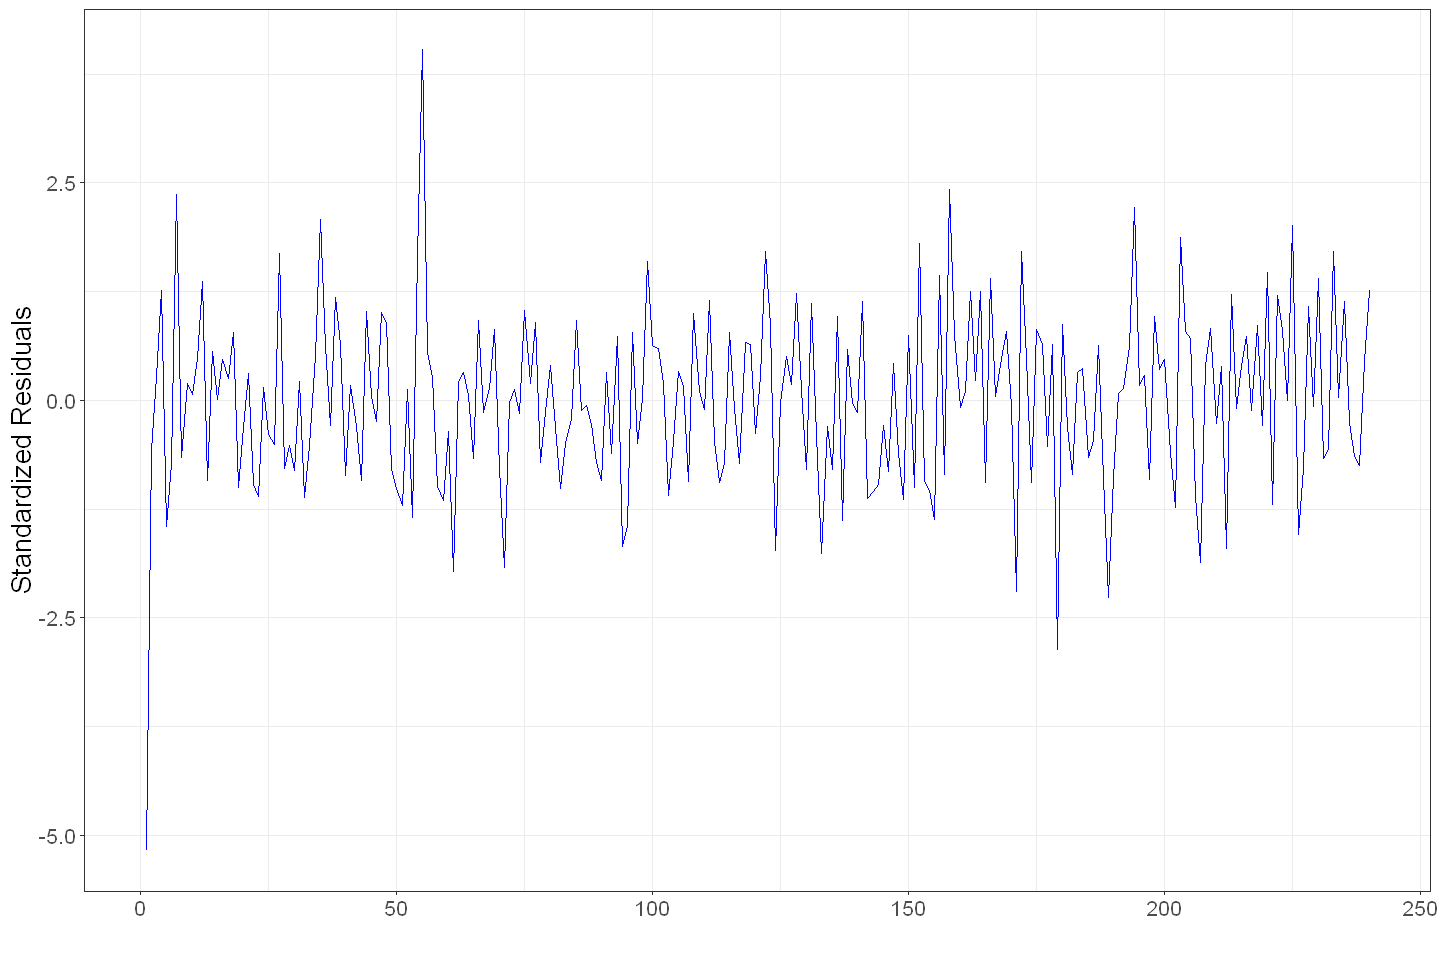

In [61]:
r = residuals(model_m2_garch)[-1]
std_resid = r - mean(r) / sd(r)

ggplot() + 
  geom_line(aes(x = 1:length(std_resid), y = std_resid), color="blue", na.rm=TRUE) + 
  xlab('') + ylab('Standardized Residuals') +
  theme_bw() + theme(text = element_text(size=16))

A few residuals have significant magnitude after standardization, suggesting they are outliers.

In [62]:
shapiro.test(std_resid)


	Shapiro-Wilk normality test

data:  std_resid
W = 0.97304, p-value = 0.0001581


Non-normality of residuals is accepted.

**(d)**

In [63]:
xreg = data.table(
    IO_56 = rep(0, length(Y)),
    AO_2 = rep(0, length(Y)),
    AO_8 = rep(0, length(Y))
)
xreg[['IO_56']][56] = 1
xreg[['AO_2']][2:length(Y)] = 1
xreg[['AO_8']][8:length(Y)] = 1

model = arima(Y, c(0, 1, 1), xreg=xreg)
print(model)
coeftest(model)


Call:
arima(x = Y, order = c(0, 1, 1), xreg = xreg)

Coefficients:
         ma1   IO_56     AO_2    AO_8
      0.2940  0.0886  -0.3388  0.2974
s.e.  0.0665  0.0450   0.0763  0.0723

sigma^2 estimated as 0.005715:  log likelihood = 279.18,  aic = -548.35



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ma1    0.294013   0.066540  4.4186 9.934e-06 ***
IO_56  0.088607   0.044960  1.9708   0.04875 *  
AO_2  -0.338814   0.076325 -4.4391 9.034e-06 ***
AO_8   0.297446   0.072305  4.1138 3.892e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [64]:
r = model$resid
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.99404, p-value = 0.4572


Normality of residuals cannot be rejected.

Based on the normality tests, it seems that the IMA(1, 1) model with outliers is a better model than the IMA(1, 1) + GARCH(1, 1) model.